# 라이브러리 불러오기

In [1]:
import matplotlib as mpl
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import openpyxl
import collections

from sklearn.decomposition import PCA
from tslearn.clustering import TimeSeriesKMeans, KShape, KernelKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import os

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,4)

# 회귀분석

In [2]:
import pandas as pd
import xlwings as xw
df = xw.Book('ALL_DATA5.xlsx')
df = df.sheets(1).used_range.options(pd.DataFrame).value
df = df.reset_index()

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 182156 entries, 0 to 182155
Data columns (total 34 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Name              182156 non-null  object 
 1   DATE              182156 non-null  object 
 2   업종                122767 non-null  object 
 3   시가총액              103029 non-null  float64
 4   수정주가(보통)          103029 non-null  float64
 5   수정PBR             89067 non-null   float64
 6   총자산               102119 non-null  float64
 7   총부채               102119 non-null  float64
 8   총차입부채             102116 non-null  float64
 9   총자본               102119 non-null  float64
 10  매출액               108919 non-null  float64
 11  매출총이익             108919 non-null  float64
 12  영업이익              108919 non-null  float64
 13  지배주주순이익           108919 non-null  float64
 14  EBITDA            109291 non-null  float64
 15  현금흐름(보통)          108916 non-null  float64
 16  영업활동으로인한현금흐름      85

In [4]:
df_test = pd.pivot_table(df, index='DATE', columns="Name", values=['매출액','영업이익','매출총이익','EBITDA','현금흐름(보통)','지배주주순이익','시가총액'])

In [5]:
df_test['시가총액'] = df_test['시가총액'].shift(-1)

In [6]:
df_feature = df_test.copy()
values=['매출액','영업이익','매출총이익','EBITDA','현금흐름(보통)','지배주주순이익','시가총액']

## TTM으로 변환
for stock in values[:-1]:
    df_feature[stock] =  df_feature[stock].rolling(window=4).sum() 


In [7]:
df_f = df_feature.unstack().reset_index()

In [8]:
df_f = pd.pivot_table(df_f,index = ['Name','DATE'] , columns = "level_0",values = 0,dropna = False).reset_index()

In [9]:
df_reg = df_f.replace(0,np.nan).dropna(axis=0)

In [11]:
df_corr = pd.DataFrame(df_reg.corr()['시가총액'].sort_values(ascending = False) , columns = ['시가총액'])
df_corr.style.background_gradient(cmap='viridis')

,시가총액
level_0,
시가총액,1.000000
현금흐름(보통),0.917743
EBITDA,0.916414
영업이익,0.888249
지배주주순이익,0.874533
매출총이익,0.874341
매출액,0.806571


In [12]:
df_reg

level_0,Name,DATE,EBITDA,매출액,매출총이익,시가총액,영업이익,지배주주순이익,현금흐름(보통)
3,3S,20104Q,4.453583e+09,2.007460e+10,5.382213e+09,1.503020e+11,2.462501e+09,1.879642e+09,2.423392e+09
4,3S,20111Q,4.527040e+09,2.083461e+10,5.584933e+09,3.676200e+11,2.524110e+09,1.272340e+09,1.827938e+09
5,3S,20112Q,4.512393e+09,2.205920e+10,5.716986e+09,9.804350e+11,2.486689e+09,1.695075e+09,2.273447e+09
6,3S,20113Q,5.186456e+09,2.200989e+10,6.135211e+09,8.007540e+11,2.731197e+09,1.613312e+09,2.621239e+09
7,3S,20114Q,4.214228e+09,2.200989e+10,6.135211e+09,6.811220e+11,2.731197e+09,1.613312e+09,2.621239e+09
...,...,...,...,...,...,...,...,...,...
154122,힘스,20213Q,9.496973e+08,5.919484e+10,1.636453e+10,1.114260e+11,-5.538367e+08,6.952570e+08,2.198791e+09
154123,힘스,20214Q,-2.794112e+09,5.058420e+10,1.327535e+10,1.032810e+11,-4.371187e+09,-4.413924e+08,1.135683e+09
154124,힘스,20221Q,-3.087911e+09,4.903777e+10,1.135008e+10,7.092800e+10,-4.687335e+09,-1.899349e+09,-2.999254e+08
154125,힘스,20222Q,-6.740493e+09,4.382824e+10,9.846871e+09,7.126700e+10,-8.363693e+09,-4.028415e+09,-2.405215e+09


<AxesSubplot:xlabel='level_0', ylabel='level_0'>

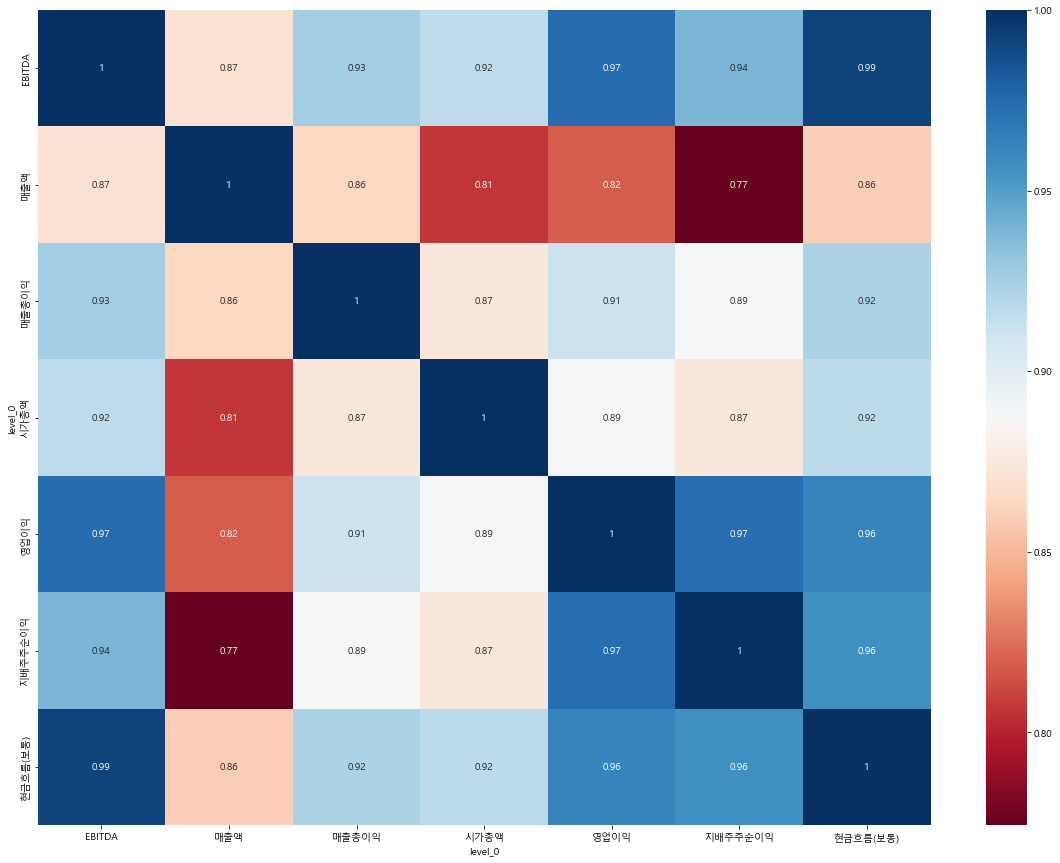

In [13]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,4)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
sns.heatmap(df_reg.corr(), annot = True,cmap = "RdBu")

In [14]:
df_reg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91840 entries, 3 to 154126
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      91840 non-null  object 
 1   DATE      91840 non-null  object 
 2   EBITDA    91840 non-null  float64
 3   매출액       91840 non-null  float64
 4   매출총이익     91840 non-null  float64
 5   시가총액      91840 non-null  float64
 6   영업이익      91840 non-null  float64
 7   지배주주순이익   91840 non-null  float64
 8   현금흐름(보통)  91840 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.0+ MB


In [15]:
X = df_reg[['매출액','지배주주순이익','매출총이익']]
y = df_reg['시가총액']

In [16]:
X = df_reg.drop(['Name','DATE','시가총액'],axis=1)
y = df_reg['시가총액']

In [17]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
# 학습데이터 , 테스트 데이터 분리
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 156)

In [18]:
import statsmodels.api as sm

model = sm.OLS(endog = y, exog = X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   시가총액   R-squared:                       0.885
Model:                            OLS   Adj. R-squared:                  0.885
Method:                 Least Squares   F-statistic:                 1.418e+05
Date:                Mon, 26 Dec 2022   Prob (F-statistic):               0.00
Time:                        15:34:42   Log-Likelihood:            -2.7587e+06
No. Observations:               91840   AIC:                         5.518e+06
Df Residuals:                   91834   BIC:                         5.518e+06
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EBITDA        95.2798      0.547    174.096      0.000      94.207      96.352
매출액            0.0644      0.003     23.083      0.000       0.059       0.070
매출총이익          0.5029      0.011     47.652      0.000       0.482       0.524
영업이익         -95.8759      0.556   -172.338      0.000     -96.966     -94.785
지배주주순이익       95.5683      0.557    171.517      0.000      94.476      96.660
현금흐름(보통)     -91.9562      0.555   -165.586      0.000     -93.045     -90.868
==============================================================================
Omnibus:                   182764.376   Durbin-Watson:                   0.403
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       5265069468.555
Skew:                          15.198   Prob(JB):                         0.00
Kurtosis:                    1175.589   Cond. No.                         979.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

다중공선성 확인

In [19]:
earning = ['매출액','지배주주순이익','매출총이익']

from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(
    df_reg[earning].values, i) for i in range(len(earning))]
vif["features"] = earning
vif

,VIF Factor,features
0,3.897114,매출액
1,4.672883,지배주주순이익
2,7.423503,매출총이익


단계적선택법 : 해당 변수들끼리 다중공선성이 높아 사용 X

In [20]:
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

X = df_reg[['매출액','영업이익','지배주주순이익','현금흐름(보통)','EBITDA','매출총이익']]
y = df_reg['시가총액']
# 학습데이터 , 테스트 데이터 분리
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2 , random_state = 156)

In [21]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression
sfs_fss = SFS(LinearRegression(),
             k_features=(3), # 몇 개의 변수를 추출할지
             forward=True, # True는 forward, False는 backward
             floating=False, # Stepwise는 True
             scoring=None, # regression에서는 default none 값
             cv=5) # k-fold cross-validation
sfs_fss.fit(X, y)

sfs_fss.k_feature_names_

('현금흐름(보통)', 'EBITDA', '매출총이익')

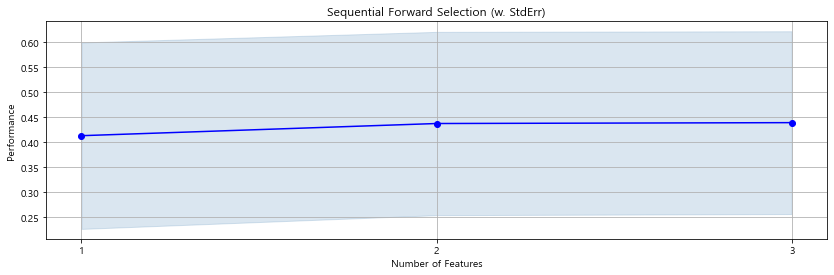

In [22]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt
fig1 = plot_sfs(sfs_fss.get_metric_dict(), kind='std_dev')
plt.title('Sequential Forward Selection (w. StdErr)')
plt.grid()
plt.show()

각각의 데이터프레임에서 사용해야할 변수만 따로 지정하여 통합 데이터프레임 구축

# 프로젝트

## 구분 데이터

In [2]:
df_target = pd.read_csv('성장주분석리스트.csv',encoding = 'cp949',index_col = 0)
df_target

,gubun,stock_name,stock_code
0,급상승,CJ제일제당,97950
1,급상승,DB하이텍,990
2,급상승,DL건설,1880
3,급상승,FSN,214270
4,급상승,GST,83450
...,...,...,...
1049,하락세,한솔홀딩스,4150
1050,하락세,현대두산인프라코어,42670
1051,하락세,화인베스틸,133820
1052,하락세,효성,4800


## 급상승이며 지속상승인 종목들에 대해 급상승으로 태깅

In [3]:
## 급상승인 종목이름
drop_list = df_target[df_target['gubun'] == '급상승']['stock_name'].values 


## 지속상승이면서 급상승인 경우 급상승으로만 태깅
def label(df):
    if  df['gubun'] == '지속상승' and  df['stock_name'] in drop_list:
        return 1
    else:
        return 0
df_target['target'] = df_target.apply(label,axis=1)
df_target = df_target[df_target['target'] == 0].drop('target',axis =1)



## 재무제표 데이터와 구분 데이터 결합

In [5]:
import pandas as pd
import xlwings as xw
df = xw.Book('All_DATA5.xlsx')
df = df.sheets(1).used_range.options(pd.DataFrame).value

df = df.reset_index()

In [6]:
df = pd.merge(df,df_target,left_on = 'Name' , right_on = 'stock_name',how = 'left').drop(['stock_name','stock_code'],axis=1)
df['gubun'].fillna('x',inplace = True)

In [7]:
df['gubun'].value_counts()

x       135720
성장둔화     16536
지속상승     14924
급상승       7696
하락세       4108
상승전환      3172
Name: gubun, dtype: int64

## 파생변수 생성(TTM,YOY)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182156 entries, 0 to 182155
Data columns (total 35 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Name              182156 non-null  object 
 1   DATE              182156 non-null  object 
 2   업종                122767 non-null  object 
 3   시가총액              103029 non-null  float64
 4   수정주가(보통)          103029 non-null  float64
 5   수정PBR             89067 non-null   float64
 6   총자산               102119 non-null  float64
 7   총부채               102119 non-null  float64
 8   총차입부채             102116 non-null  float64
 9   총자본               102119 non-null  float64
 10  매출액               108919 non-null  float64
 11  매출총이익             108919 non-null  float64
 12  영업이익              108919 non-null  float64
 13  지배주주순이익           108919 non-null  float64
 14  EBITDA            109291 non-null  float64
 15  현금흐름(보통)          108916 non-null  float64
 16  영업활동으로인한현금흐름      85

In [9]:
df

,Name,DATE,업종,시가총액,수정주가(보통),수정PBR,총자산,총부채,총차입부채,총자본,...,총자산/총자본,현금및현금성자산구성비율,영업이익률_TTM,EBITDA마진율_TTM,지배주주순이익률_TTM,ROA(영업이익_TTM),ROE(지배주주순이익_TTM),매출원가율,판관비율,gubun
0,삼성전자,20101Q,반도체,1.327752e+14,16360.0,1.74,1.150958e+14,3.985685e+13,8.251037e+12,7.523895e+13,...,152.97,8.02,10.22,17.96,9.13,NaN,NaN,66.43,21.92,성장둔화
1,삼성전자,20102Q,반도체,1.259972e+14,15480.0,1.53,1.256767e+14,4.398010e+13,1.036686e+13,8.169656e+13,...,153.83,6.87,11.29,18.78,10.09,NaN,NaN,64.73,22.86,성장둔화
2,삼성전자,20103Q,반도체,1.271698e+14,15540.0,1.47,1.322299e+14,4.667139e+13,1.101383e+13,8.555847e+13,...,154.55,8.05,11.34,18.55,10.19,NaN,NaN,64.67,23.52,성장둔화
3,삼성전자,20104Q,반도체,1.546060e+14,18980.0,1.73,1.342887e+14,4.493965e+13,1.077537e+13,8.934909e+13,...,150.30,7.29,10.75,18.12,10.22,13.49,20.37,69.54,22.98,성장둔화
4,삼성전자,20111Q,반도체,1.515539e+14,18640.0,1.67,1.365322e+14,4.503340e+13,1.154779e+13,9.149875e+13,...,149.22,8.58,9.80,17.22,9.24,12.23,18.22,70.45,22.00,성장둔화
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182151,SNK,20214Q,소프트웨어,4.475630e+11,21250.0,1.87,2.675143e+11,2.724878e+10,3.875410e+09,2.402656e+11,...,111.34,69.46,6.75,16.23,-16.27,1.52,-3.98,25.02,66.65,x
182152,SNK,20221Q,소프트웨어,4.001740e+11,19000.0,1.67,2.794432e+11,3.881410e+10,1.429174e+10,2.406291e+11,...,116.13,62.36,7.96,16.93,-5.99,2.02,-1.72,20.76,84.99,x
182153,SNK,20222Q,소프트웨어,7.782340e+11,36950.0,3.22,2.722610e+11,3.028472e+10,5.684088e+09,2.419763e+11,...,112.52,68.42,6.58,15.31,-6.71,1.71,-1.95,26.19,82.86,x
182154,SNK,20223Q,소프트웨어,7.813930e+11,37100.0,3.30,2.643847e+11,2.714679e+10,4.852180e+09,2.372379e+11,...,111.44,63.84,2.23,10.48,0.20,0.60,0.06,14.97,72.03,x


In [10]:
def ttm(df,col):
    var = pd.pivot_table(df, index='DATE', columns="Name", values=col).rolling(window=4).sum()
    df_v = var.unstack().reset_index().rename(columns = {0 : col+'_TTM'})
    df = pd.merge(df,df_v,on = ['Name','DATE'], how = 'left')
    
    return df

def yoy(df,col):
    var = pd.pivot_table(df, index = 'DATE', columns = "Name" , values = col)
    for stock in var.columns:
        var[stock] =  (var[stock] - var[stock].shift(4))/abs(var[stock].shift(4))
    df_v = var.unstack().reset_index().rename(columns = {0 : col+'증가율'})
    df = pd.merge(df,df_v,on = ['Name','DATE'], how = 'left')
    
    return df

In [11]:
for i in ['매출액','영업이익','매출총이익','EBITDA','현금흐름(보통)','지배주주순이익','영업활동으로인한현금흐름','투자활동으로인한현금흐름','재무활동으로인한현금흐름']:
    df = ttm(df,i)

In [12]:
for i in ['매출액_TTM','영업이익_TTM','매출총이익_TTM','EBITDA_TTM','지배주주순이익_TTM','총자본','총자산','총부채','수정EPS']:
    df = yoy(df,i)

In [13]:
df['차입부채/영업이익'] = (df['총차입부채']/df['영업이익_TTM'])*100
df['현금흐름/매출액'] = (df['현금흐름(보통)_TTM']/df['매출액_TTM'])*100
df['매출총이익률_TTM'] = (df['매출총이익_TTM']/df['매출액_TTM'])*100
df['총자산회전율_TTM'] = (df['매출액_TTM']/df['총자산'])*100
df['총부채회전율_TTM'] = (df['매출액_TTM']/df['총부채'])*100
df['총자본회전율_TTM'] = (df['매출액_TTM']/df['총자본'])*100
df['영업활동현금흐름'] = (df['영업활동으로인한현금흐름_TTM']/df['현금흐름(보통)_TTM'])*100
df['재무활동현금흐름'] = (df['재무활동으로인한현금흐름_TTM']/df['현금흐름(보통)_TTM'])*100
df['투자활동현금흐름'] = (df['투자활동으로인한현금흐름_TTM']/df['현금흐름(보통)_TTM'])*100

In [14]:
df.columns

Index(['Name', 'DATE', '업종', '시가총액', '수정주가(보통)', '수정PBR', '총자산', '총부채',
       '총차입부채', '총자본', '매출액', '매출총이익', '영업이익', '지배주주순이익', 'EBITDA', '현금흐름(보통)',
       '영업활동으로인한현금흐름', '투자활동으로인한현금흐름', '재무활동으로인한현금흐름', '수정EPS', '수정BPS',
       '수정SPS', '수정CFPS', '수정PER_TTM', '부채비율', '총자산/총자본', '현금및현금성자산구성비율',
       '영업이익률_TTM', 'EBITDA마진율_TTM', '지배주주순이익률_TTM', 'ROA(영업이익_TTM)',
       'ROE(지배주주순이익_TTM)', '매출원가율', '판관비율', 'gubun', '매출액_TTM', '영업이익_TTM',
       '매출총이익_TTM', 'EBITDA_TTM', '현금흐름(보통)_TTM', '지배주주순이익_TTM',
       '영업활동으로인한현금흐름_TTM', '투자활동으로인한현금흐름_TTM', '재무활동으로인한현금흐름_TTM',
       '매출액_TTM증가율', '영업이익_TTM증가율', '매출총이익_TTM증가율', 'EBITDA_TTM증가율',
       '지배주주순이익_TTM증가율', '총자본증가율', '총자산증가율', '총부채증가율', '수정EPS증가율', '차입부채/영업이익',
       '현금흐름/매출액', '매출총이익률_TTM', '총자산회전율_TTM', '총부채회전율_TTM', '총자본회전율_TTM',
       '영업활동현금흐름', '재무활동현금흐름', '투자활동현금흐름'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 182156 entries, 0 to 182155
Data columns (total 62 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Name              182156 non-null  object 
 1   DATE              182156 non-null  object 
 2   업종                122767 non-null  object 
 3   시가총액              103029 non-null  float64
 4   수정주가(보통)          103029 non-null  float64
 5   수정PBR             89067 non-null   float64
 6   총자산               102119 non-null  float64
 7   총부채               102119 non-null  float64
 8   총차입부채             102116 non-null  float64
 9   총자본               102119 non-null  float64
 10  매출액               108919 non-null  float64
 11  매출총이익             108919 non-null  float64
 12  영업이익              108919 non-null  float64
 13  지배주주순이익           108919 non-null  float64
 14  EBITDA            109291 non-null  float64
 15  현금흐름(보통)          108916 non-null  float64
 16  영업활동으로인한현금흐름      85

## 전처리

매출액,지배주주순이익,매출총이익이 0인 값을 nan으로 대체(증가율을 구하는데 inf의 문제가 발생 또한 이익이 0인 경우는 이상치로 생각후 제외)

In [15]:
def increase_rate(df):
    """
    TTM증가율 계산
    """
    for stock in df.columns:
        df[stock] = (df[stock] - df[stock].shift(1))/abs(df[stock].shift(1))
    df.drop(drop_date,axis =0, inplace = True) 
    df = df.replace([np.inf, -np.inf], np.nan).dropna(axis=1)
    return df

def process(df):
    """
    IQR 방식으로 이익성장레이블링 기준 설정
    """
    df_des = pd.DataFrame(df.unstack(),columns = ['value'])
    q3 = df_des.quantile(0.75).value
    q1 = df_des.quantile(0.25).value
    IQR = q3 - q1
    outlier_upper = q3+(1.5*IQR)
    outlier_lower = q1-(1.5*IQR)
    
    df = df.applymap(lambda x : labeled(x,outlier_upper,q3,q1,outlier_lower))
    return df

def labeled(row,outlier_upper,q3,q1,outlier_lower):
    """
    이익성장레이블링 : 기초통계량을 통해 이익지표ttm의 증가율이
    outlier_upper보다 크면 5 / 
    outlier_upper ~ q3 : 2 / 
    q3~ 0 : 1 / 
    0 ~ q1 = -1 / 
    q1 ~ outlier_lower : -2 /
    outlier_lower보다 작으면 -5
    """
    try:
        if row.isna():
            return np.nan
    except:
        
        if row>= outlier_upper:
            return 5
        elif row >= q3:
            return 2
        elif row >= 0:
            return 1
        elif row >= q1:
            return -1
        elif row >= outlier_lower:
            return -2
        else: 
            return -5
        
def cluster_naming(df1,df2):
    """
    첫분기, 중간분기, 마지막분기 값을 기준으로 추세를 매겨 성장레이블링 지정
    """
    for i in range(4):
        a = df1[i].mean(axis=1)[0]
        b = df1[i].mean(axis=1)[len(df1.index)//2]
        c = df1[i].mean(axis=1)[-1]
        
        if a>b>c:
            df2['cluster'].replace(i,'하락세',inplace =True)
        elif a<b<c:
            df2['cluster'].replace(i,'지속상승',inplace =True)
        elif a>b<c:
            df2['cluster'].replace(i,'상승전환',inplace =True)
        else:
            df2['cluster'].replace(i,'하락전환',inplace =True)
    
    return df2

def result_test(df,date):
    """
    군집화 첫분기를 기준으로 SMB, HML 변수 생성
    """
    value_group = df[df['DATE'] == date][['Name','시가총액','수정PBR']]
    value_group = value_group.replace('N/A',np.nan)
    drop_list = value_group[value_group['수정PBR'].isnull()]['Name'].unique()
    value_group = value_group.dropna(axis=0)
    
    for i in drop_list:
        df = df.loc[~df['Name'].isin(drop_list)]
        
        
    for i in drop_list:
        value_group = value_group.loc[~value_group['Name'].isin(drop_list)]
    
    value_group['SMB'] = value_group['시가총액'].apply(lambda x : 'S' if x <= value_group['시가총액'].median()
                                                        else 'B')
    value_group['HML'] = value_group['수정PBR'].apply(lambda x : 'L' if x <= value_group['수정PBR'].quantile(0.3)
                                                      else ( 'M' if x <= value_group['수정PBR'].quantile(0.7)
                                                       else 'H'))
    value_group['group'] = value_group['SMB']+value_group['HML']

    value_group

    return value_group,df

def rate_of_return(df,date_x,date_y):
    """
    x날짜대비 y날짜의 수익률
    """
    x = df[(df['DATE'] == date_x)]['수정주가(보통)']
    y = df[(df['DATE'] == date_y)]['수정주가(보통)']
    rate = (y.values-x.values)/x.values 
    return rate

In [16]:
# 매출액,지배주주순이익,매출총이익이 0인 값을 nan으로 대체(증가율을 구하는데 inf의 문제가 발생 또한 이익이 0인 경우는 이상치로 생각후 제외)
df[['매출액','지배주주순이익','매출총이익','시가총액']] = df[['매출액','지배주주순이익','매출총이익','시가총액']].replace(0,np.nan)

# 매출액, 순이익 ,매출총이익 피벗 데이터프레임 구축
df_매출액 = pd.pivot_table(df, index='DATE', columns="Name", values='매출액').rolling(window=4).sum()
df_순이익 = pd.pivot_table(df, index='DATE', columns="Name", values='지배주주순이익').rolling(window=4).sum()
df_매출총이익 = pd.pivot_table(df, index='DATE', columns="Name", values= '매출총이익').rolling(window=4).sum()

list_of_df = [] # 빈 list를 만듦.
date_list = list(df_매출액.index)

## 3년 군집화를 분기마다 이동시켜 반복 진행(최근 3년이 없을경우 중단 - 20193Q까지)
for i in range(4,len(date_list)-13):
    use_date = date_list[i:12+i]
    drop_date = [x for x in date_list if x not in use_date]

    df_sales = df_매출액.copy()
    df_net = df_순이익.copy()
    df_gross_sales = df_매출총이익.copy()
    # def processing(df1,df2,df3,drop_date):

    # TTM을 증가율로 변환
    df_sales = increase_rate(df_sales)
    df_net = increase_rate(df_net)
    df_gross_sales = increase_rate(df_gross_sales)

    # 세변수 모두 가지는 종목 join
    col_list = list(set(df_sales.columns)&set(df_net.columns)&set(df_gross_sales.columns))
    col_list.sort()
    df_sales = df_sales[col_list]
    df_net = df_net[col_list]
    df_gross_sales = df_gross_sales[col_list]

    # 증가율을 이익성장레이블링으로 카테고리화
    df_sales_label = process(df_sales)
    df_net_label = process(df_net)
    df_gross_sales_label = process(df_gross_sales)

    # 매출액 이익성장레이블과 영업이익 이익성장레이블을 합하여 데이터 구축
    df_fin_label = df_sales_label.add(df_net_label).add(df_gross_sales_label)

    # 누적합
    df_fin_cumsum = df_fin_label.cumsum()

    # TimeSeries MeanVariance 스케일링
    df_x = df_fin_cumsum.T.to_numpy()
    df_x = TimeSeriesScalerMeanVariance().fit_transform(df_x)

    #TimeSeries K-means (euclidian) 학습

    sz = df_x.shape[1]
    km = TimeSeriesKMeans(n_clusters=4 ,
                               metric="euclidean",
                               verbose=False,
                              random_state= 42,
                          n_jobs=-1).fit(df_x)
    y_pred = km.fit_predict(df_x)

    #클러스터링 결과
    df_cluster = pd.DataFrame(list(zip(df_fin_cumsum.T.index, km.labels_)), columns=['Name', 'cluster'])

    #기존의 눈으로 레이블링과 비교용
    df_gubun = df[['Name','gubun']].drop_duplicates()
    df_result = pd.merge(df_cluster,df_gubun,on = 'Name')

    #클러스터링 결과와 기존 재무제표데이터를 결합한 데이터프레임 구축
    df_test = pd.merge(df, df_cluster,on = 'Name',how = 'left')
    
    #이익성장레이블링과 누적합 변수 결합
    df_earning_label = df_fin_label.unstack().reset_index().rename(columns = {0 : 'earning'})
    df_cumsum_label = df_fin_cumsum.unstack().reset_index().rename(columns = {0 : 'Cumsum'})
    
    #모든 파생변수 결합
    from functools import reduce
    data_list = [df_test,df_earning_label,df_cumsum_label]
    df_train = reduce(lambda x,y : pd.merge(x,y , on = ['Name','DATE']),data_list)

    #클러스터링을 추세에 따라 맵핑(지속상승,하락세,상승전환,하락전환)
    df_name = pd.pivot_table(df_train, index='DATE', columns=['cluster',"Name"], values='Cumsum')
    df_train = cluster_naming(df_name,df_train)
    df_cluster = cluster_naming(df_name,df_cluster)
    # HML,SMB 파생변수 생성
    group_date = df_train['DATE'].unique()[0]
    value_group,df_data = result_test(df_train,group_date)
    
    ## 중복행 제거(합병된경우)
    value_group = value_group.drop_duplicates(subset=['Name'], keep='first', inplace=False, ignore_index=False)
    df_data = df_data.drop_duplicates(subset=['Name','DATE'], keep='first', inplace=False, ignore_index=False)
    
    # 데이터프레임에 HML,SMB 파생변수 결합
    df_data = pd.merge(df_data,value_group[['Name','group','SMB','HML']] , on = 'Name' , how = 'left')
    start_date = df_data['DATE'].unique()[0]
    end_date = df_data['DATE'].unique()[-1]
    rate = rate_of_return(df_data,start_date,end_date)
    value_group['수익률'] = rate
    
    # 군집결과와 결합
    cluster_value = pd.merge(value_group,df_cluster, on = 'Name', how = 'left')
    print(start_date,cluster_value.groupby(['SMB','cluster']).describe()['수익률'].sort_values(by = 'mean',ascending = False)[['mean']].iloc[[0]])
    print()
    
    # 대형가치주 지속상승 종목 구분
    rise_group = cluster_value[cluster_value['cluster'] == '지속상승']['Name'].unique()
    df_data['target'] = df_data.apply(lambda x : 1 if (x['Name'] in rise_group) & (x['DATE'] == start_date) else 0,axis=1)
    
    df_merge = df_data[df_data['DATE'] == start_date] 
    
    list_of_df.append(df_merge)

df_var = pd.concat(list_of_df)

20111Q                  mean
SMB cluster          
S   지속상승     0.690832

20112Q                  mean
SMB cluster          
S   지속상승     1.094091

20113Q                  mean
SMB cluster          
S   지속상승     1.578561

20114Q                  mean
SMB cluster          
S   지속상승     1.247687

20121Q                  mean
SMB cluster          
S   지속상승     0.530642

20122Q                  mean
SMB cluster          
S   지속상승     0.984401

20123Q                  mean
SMB cluster          
S   지속상승     1.146225

20124Q                  mean
SMB cluster          
S   지속상승     1.419666

20131Q                  mean
SMB cluster          
S   지속상승     1.147477

20132Q                  mean
SMB cluster          
S   지속상승     1.343144

20133Q                  mean
SMB cluster          
S   지속상승     1.308135

20134Q                 mean
SMB cluster         
S   지속상승     1.63404

20141Q                  mean
SMB cluster          
S   지속상승     1.050374

20142Q                  mean
SMB cluster 

In [17]:
df_var

,Name,DATE,업종,시가총액,수정주가(보통),수정PBR,총자산,총부채,총차입부채,총자본,...,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름,cluster,earning,Cumsum,group,SMB,HML,target
0,삼성전자,20111Q,반도체,1.515539e+14,18640.0,1.67,1.365322e+14,4.503340e+13,1.154779e+13,9.149875e+13,...,88.439556,9.205760,-87.539545,지속상승,-1,-1,BH,B,H,1
12,SK하이닉스,20111Q,반도체,1.847584e+13,31300.0,2.28,1.737688e+13,9.276888e+12,6.230547e+12,8.099989e+12,...,92.264651,-11.180794,-79.759865,상승전환,-4,-4,BH,B,H,0
24,LG화학,20111Q,소재,3.173204e+13,460000.0,4.23,1.392665e+13,5.741833e+12,2.335063e+12,8.184817e+12,...,88.659791,-14.097299,-57.823807,하락세,4,4,BH,B,H,0
36,삼성SDI,20111Q,하드웨어,7.749742e+12,168000.0,1.28,8.127204e+12,1.938966e+12,4.224186e+11,6.188238e+12,...,69.713600,-69.990818,-82.571333,하락전환,0,0,BM,B,M,0
48,현대차,20111Q,자동차 및 부품,4.918953e+13,203000.0,1.78,9.780805e+13,6.330193e+13,3.923151e+13,3.450612e+13,...,49.359064,79.457724,-86.802809,하락전환,4,4,BH,B,H,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22932,참존글로벌,20193Q,자본재,3.253300e+10,8966.0,0.07,8.124034e+10,5.111329e+10,4.329196e+10,3.012704e+10,...,74.136276,-153.037033,109.804373,상승전환,9,9,SL,S,L,0
22944,에이치엔티,20193Q,하드웨어,2.289240e+11,2670.0,3.92,1.357090e+11,7.904563e+10,3.387743e+10,5.666340e+10,...,-179.413707,-502.132256,741.129147,하락세,5,5,BH,B,H,0
22956,파티게임즈,20193Q,소프트웨어,1.312600e+10,536.0,0.58,1.806437e+11,1.233282e+11,4.382923e+10,5.731548e+10,...,35.372352,-96.632464,90.665848,상승전환,5,5,SL,S,L,0
22968,맘스터치,20193Q,소비자 서비스,2.632380e+11,27800.0,3.19,1.363274e+11,5.397486e+10,2.054808e+10,8.235255e+10,...,134.564970,-68.292379,-27.913298,지속상승,1,1,BH,B,H,1


# 모델링

In [18]:
df_var.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50891 entries, 0 to 22980
Data columns (total 69 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Name              50891 non-null  object 
 1   DATE              50891 non-null  object 
 2   업종                50847 non-null  object 
 3   시가총액              50891 non-null  float64
 4   수정주가(보통)          50891 non-null  float64
 5   수정PBR             50891 non-null  float64
 6   총자산               50891 non-null  float64
 7   총부채               50891 non-null  float64
 8   총차입부채             50891 non-null  float64
 9   총자본               50891 non-null  float64
 10  매출액               50891 non-null  float64
 11  매출총이익             50891 non-null  float64
 12  영업이익              50891 non-null  float64
 13  지배주주순이익           50891 non-null  float64
 14  EBITDA            50891 non-null  float64
 15  현금흐름(보통)          50891 non-null  float64
 16  영업활동으로인한현금흐름      42257 non-null  float6

In [19]:
df_var['target'].value_counts()

0    32001
1    18890
Name: target, dtype: int64

## 사용할 독립변수 선정

In [20]:
import numpy as np
df_var[['매출액_TTM증가율','매출총이익_TTM증가율','수정EPS증가율']] = df_var[['매출액_TTM증가율','매출총이익_TTM증가율','수정EPS증가율']].astype('float64')

In [21]:
model_data = df_var[['Name','DATE','업종','수정PBR','부채비율', '현금및현금성자산구성비율',
       '영업이익률_TTM', '지배주주순이익률_TTM', 'ROA(영업이익_TTM)','ROE(지배주주순이익_TTM)',
       '매출액_TTM증가율', '영업이익_TTM증가율', '매출총이익_TTM증가율', 'EBITDA_TTM증가율',
       '지배주주순이익_TTM증가율', '총자본증가율', '총자산증가율', '총부채증가율', '수정EPS증가율', '차입부채/영업이익',
        '매출총이익률_TTM', '총자산회전율_TTM', '총부채회전율_TTM', '총자본회전율_TTM',
       '영업활동현금흐름', '재무활동현금흐름', '투자활동현금흐름','earning','target']]

In [22]:
model_data = model_data.replace([np.inf, -np.inf], np.nan)

In [23]:
model_data = model_data.dropna(axis=0)

## 학습 , 테스트 데이터 분리
     2019년도 데이터를 테스트데이터로 사용

In [24]:
train = model_data[(~model_data['DATE'].str.contains('2019'))]
test = model_data[model_data['DATE'].str.contains('2019')]

## 상관관계 분석

<AxesSubplot:>

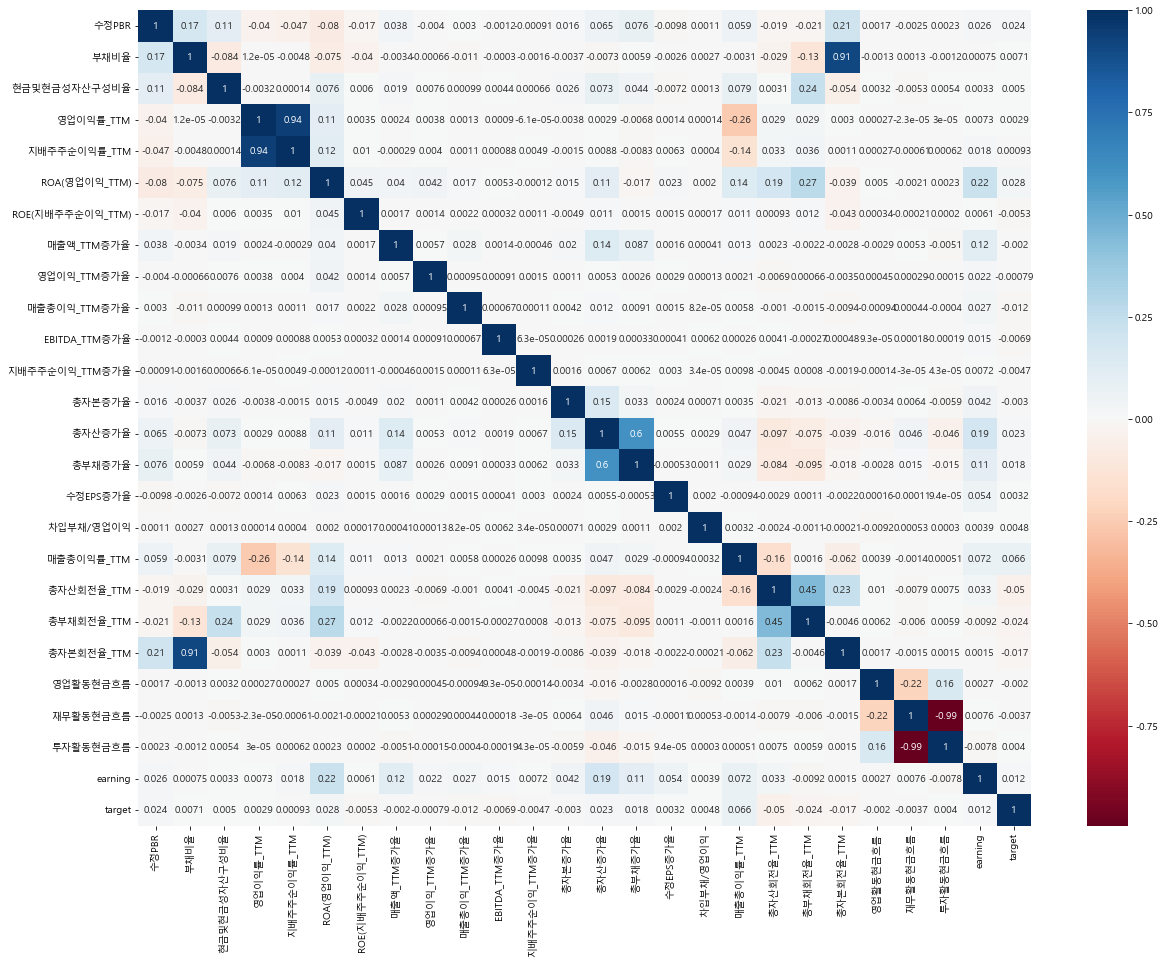

In [25]:
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,4)

import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
plt.figure(figsize = (20,15))
sns.heatmap(model_data.corr(), annot = True,cmap = "RdBu")

In [26]:
from sklearn.metrics import *
def get_clf_eval(y_test, model,pred=None): 
    """
    이진분류모델 성능지표
    """
    confusion = confusion_matrix(y_test, pred) 
    accuracy = accuracy_score(y_test, pred) 
    precision = precision_score(y_test, pred) 
    recall = recall_score(y_test, pred) 
    f1 = f1_score(y_test, pred) 
    class_name= model.__class__.__name__
    print(confusion)
    print(f'-------{class_name} ------- \n정확도: {accuracy:.4f}, 정밀도: {precision:.4f}, 재현율: {recall:.4f}, f1_score: {f1:.4f}')

In [27]:
X = train.drop(['Name','DATE','업종','수정PBR','target'],axis=1)
y = train['target']

In [28]:
## 학습 및 검증 데이터 분리
from sklearn.model_selection import train_test_split
train_X,valid_X,train_y,valid_y= train_test_split(X,y, test_size = 0.2,random_state = 42)

In [29]:
print('학습용 피처/레이블 데이터 세트: ', train_X.shape, train_y.shape)
print('검증용 피처/레이블 데이터 세트: ', valid_X.shape, valid_y.shape)

학습용 피처/레이블 데이터 세트:  (23595, 24) (23595,)
검증용 피처/레이블 데이터 세트:  (5899, 24) (5899,)


In [30]:
valid_y.value_counts()

0    3674
1    2225
Name: target, dtype: int64

In [31]:
scale_col = train_X.columns[:]

In [32]:
train.head(5)

,Name,DATE,업종,수정PBR,부채비율,현금및현금성자산구성비율,영업이익률_TTM,지배주주순이익률_TTM,ROA(영업이익_TTM),ROE(지배주주순이익_TTM),...,차입부채/영업이익,매출총이익률_TTM,총자산회전율_TTM,총부채회전율_TTM,총자본회전율_TTM,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름,earning,target
0,삼성전자,20114Q,반도체,1.72,53.78,9.43,9.48,8.11,10.79,14.65,...,93.622715,32.033990,105.905964,302.829817,162.862362,85.309174,11.575598,-78.589021,3,1
12,SK하이닉스,20114Q,반도체,1.65,118.89,7.22,3.55,-0.54,2.13,-0.72,...,1835.967705,16.265109,60.307006,111.032229,132.005756,83.745788,15.222623,-99.383950,-8,1
24,LG화학,20114Q,소재,2.45,57.46,9.02,12.43,9.43,20.16,24.78,...,89.639409,17.996138,148.346556,406.527450,233.584083,78.231803,2.200356,-79.632464,-1,0
36,삼성SDI,20114Q,하드웨어,1.00,35.04,8.89,2.02,5.88,1.34,5.26,...,692.352429,12.551136,63.839793,246.008491,86.212019,39.626862,35.508254,-116.221498,1,0
48,현대차,20114Q,자동차 및 부품,1.59,171.48,5.69,10.32,9.84,7.86,22.78,...,540.285327,24.288410,71.061301,112.502296,192.914278,42.316938,31.837192,-72.875769,3,1


스케일링

In [33]:
## 스케일링
from sklearn.preprocessing import MinMaxScaler
mMscaler = MinMaxScaler()
train_X[scale_col] = mMscaler.fit_transform(train_X[scale_col])
valid_X[scale_col] = mMscaler.transform(valid_X[scale_col])

RFC

In [46]:
from sklearn.ensemble import RandomForestClassifier
rfc_opt = RandomForestClassifier(random_state=121)

rfc_opt.fit(train_X,train_y)
pred_opt = rfc_opt.predict(valid_X)

get_clf_eval(valid_y,rfc_opt,pred_opt)

[[3434  240]
 [1351  874]]
-------RandomForestClassifier ------- 
정확도: 0.7303, 정밀도: 0.7846, 재현율: 0.3928, f1_score: 0.5235


0.7845389710874473

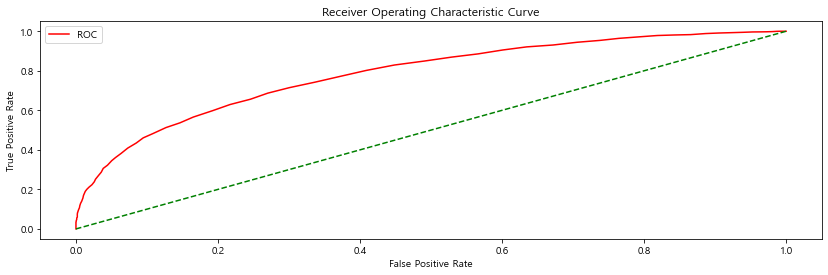

In [173]:
## ROC 곡선 시각화
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()

    
# ROC 곡선 시각화
prob_rfc = rfc_opt.predict_proba(valid_X)
probs_rfc = prob_rfc[:, 1]
fper, tper, thresholds = roc_curve(valid_y, probs_rfc)
plot_roc_curve(fper, tper)

## ROC-AUC 점수

auc_rfc = roc_auc_score(valid_y, rfc_opt.predict_proba(valid_X)[:,1])
auc_rfc

XGB

In [36]:
## GridSearchCV로 탐색한 파라미터를 적용한 XGBoost 최적화
from xgboost import XGBClassifier


xgb_opt = XGBClassifier(random_state = 121)
                        

xgb_opt.fit(train_X,train_y)
pred_opt = xgb_opt.predict(valid_X)

get_clf_eval(valid_y,xgb_opt,pred_opt)

[[3142  532]
 [1319  906]]
-------XGBClassifier ------- 
정확도: 0.6862, 정밀도: 0.6300, 재현율: 0.4072, f1_score: 0.4947


0.706010838384518

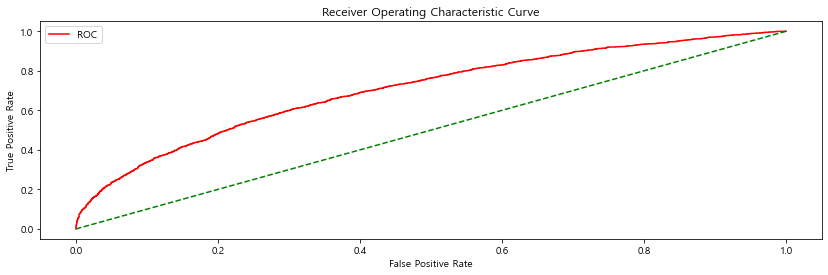

In [37]:
## ROC 곡선 시각화
def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()

    
# ROC 곡선 시각화
prob_xgb = xgb_opt.predict_proba(valid_X)
probs_xgb = prob_xgb[:, 1]
fper, tper, thresholds = roc_curve(valid_y, probs_xgb)
plot_roc_curve(fper, tper)

## ROC-AUC 점수

auc_xgb = roc_auc_score(valid_y, xgb_opt.predict_proba(valid_X)[:,1])
auc_xgb

LGBM

In [38]:
## GridSearchCV로 탐색한 파라미터를 적용한 LightGBM 최적화
from lightgbm import LGBMClassifier
lgbm_opt = LGBMClassifier(random_state = 121)
                        
lgbm_opt.fit(train_X,train_y)
pred_opt = lgbm_opt.predict(valid_X)

get_clf_eval(valid_y,lgbm_opt,pred_opt)


[[3336  338]
 [1586  639]]
-------LGBMClassifier ------- 
정확도: 0.6738, 정밀도: 0.6540, 재현율: 0.2872, f1_score: 0.3991


0.6930363379471904

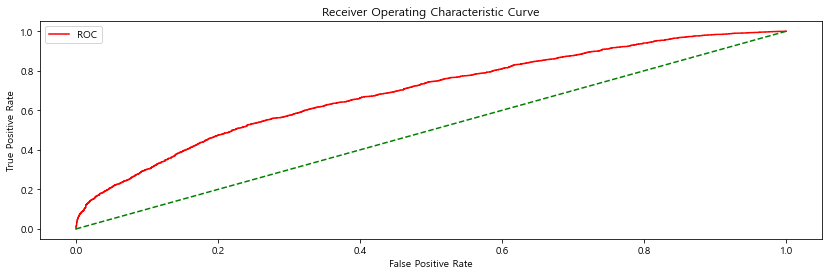

In [39]:
## ROC 곡선 시각화

prob_lgbm = lgbm_opt.predict_proba(valid_X)
probs_lgbm = prob_lgbm[:, 1]
fper, tper, thresholds = roc_curve(valid_y, probs_lgbm)
plot_roc_curve(fper, tper)

## ROC-AUC 점수

auc_lgbm = roc_auc_score(valid_y, lgbm_opt.predict_proba(valid_X)[:,1])
auc_lgbm

In [40]:
from catboost import CatBoostClassifier
cat = CatBoostClassifier(random_state = 121)
cat.fit(train_X,train_y)
cat_pred = cat.predict(valid_X)

#성능평가
get_clf_eval(valid_y,cat,cat_pred)

Learning rate set to 0.039731
0:	learn: 0.6897954	total: 153ms	remaining: 2m 32s
1:	learn: 0.6869024	total: 160ms	remaining: 1m 19s
2:	learn: 0.6840141	total: 168ms	remaining: 55.7s
3:	learn: 0.6811979	total: 175ms	remaining: 43.6s
4:	learn: 0.6788154	total: 185ms	remaining: 36.8s
5:	learn: 0.6765196	total: 195ms	remaining: 32.3s
6:	learn: 0.6742397	total: 206ms	remaining: 29.2s
7:	learn: 0.6721719	total: 217ms	remaining: 26.9s
8:	learn: 0.6702600	total: 225ms	remaining: 24.8s
9:	learn: 0.6685462	total: 236ms	remaining: 23.3s
10:	learn: 0.6667625	total: 244ms	remaining: 21.9s
11:	learn: 0.6651274	total: 251ms	remaining: 20.7s
12:	learn: 0.6635883	total: 261ms	remaining: 19.8s
13:	learn: 0.6622915	total: 269ms	remaining: 18.9s
14:	learn: 0.6611712	total: 277ms	remaining: 18.2s
15:	learn: 0.6600737	total: 286ms	remaining: 17.6s
16:	learn: 0.6589460	total: 294ms	remaining: 17s
17:	learn: 0.6579506	total: 303ms	remaining: 16.5s
18:	learn: 0.6568804	total: 311ms	remaining: 16.1s
19:	learn: 

161:	learn: 0.6118987	total: 2.16s	remaining: 11.2s
162:	learn: 0.6117606	total: 2.17s	remaining: 11.2s
163:	learn: 0.6116151	total: 2.19s	remaining: 11.1s
164:	learn: 0.6114537	total: 2.2s	remaining: 11.1s
165:	learn: 0.6112822	total: 2.21s	remaining: 11.1s
166:	learn: 0.6111024	total: 2.23s	remaining: 11.1s
167:	learn: 0.6109504	total: 2.24s	remaining: 11.1s
168:	learn: 0.6107771	total: 2.25s	remaining: 11.1s
169:	learn: 0.6104641	total: 2.27s	remaining: 11.1s
170:	learn: 0.6102688	total: 2.28s	remaining: 11.1s
171:	learn: 0.6101657	total: 2.3s	remaining: 11.1s
172:	learn: 0.6100107	total: 2.31s	remaining: 11.1s
173:	learn: 0.6098838	total: 2.33s	remaining: 11.1s
174:	learn: 0.6096200	total: 2.35s	remaining: 11.1s
175:	learn: 0.6094268	total: 2.36s	remaining: 11.1s
176:	learn: 0.6092547	total: 2.38s	remaining: 11s
177:	learn: 0.6090504	total: 2.39s	remaining: 11s
178:	learn: 0.6089171	total: 2.4s	remaining: 11s
179:	learn: 0.6087779	total: 2.41s	remaining: 11s
180:	learn: 0.6086074	t

330:	learn: 0.5805118	total: 4.34s	remaining: 8.78s
331:	learn: 0.5803127	total: 4.36s	remaining: 8.77s
332:	learn: 0.5801177	total: 4.38s	remaining: 8.77s
333:	learn: 0.5799062	total: 4.39s	remaining: 8.75s
334:	learn: 0.5796650	total: 4.4s	remaining: 8.74s
335:	learn: 0.5794084	total: 4.42s	remaining: 8.73s
336:	learn: 0.5791903	total: 4.43s	remaining: 8.71s
337:	learn: 0.5789931	total: 4.44s	remaining: 8.7s
338:	learn: 0.5787971	total: 4.45s	remaining: 8.69s
339:	learn: 0.5786068	total: 4.47s	remaining: 8.67s
340:	learn: 0.5784436	total: 4.48s	remaining: 8.66s
341:	learn: 0.5782988	total: 4.49s	remaining: 8.65s
342:	learn: 0.5780185	total: 4.51s	remaining: 8.64s
343:	learn: 0.5778069	total: 4.52s	remaining: 8.62s
344:	learn: 0.5775757	total: 4.54s	remaining: 8.61s
345:	learn: 0.5773651	total: 4.55s	remaining: 8.6s
346:	learn: 0.5772085	total: 4.56s	remaining: 8.59s
347:	learn: 0.5770116	total: 4.57s	remaining: 8.57s
348:	learn: 0.5767771	total: 4.58s	remaining: 8.55s
349:	learn: 0.5

501:	learn: 0.5502986	total: 6.3s	remaining: 6.25s
502:	learn: 0.5501218	total: 6.31s	remaining: 6.23s
503:	learn: 0.5499505	total: 6.32s	remaining: 6.22s
504:	learn: 0.5497218	total: 6.33s	remaining: 6.2s
505:	learn: 0.5495919	total: 6.34s	remaining: 6.19s
506:	learn: 0.5494326	total: 6.35s	remaining: 6.17s
507:	learn: 0.5492487	total: 6.36s	remaining: 6.16s
508:	learn: 0.5490238	total: 6.37s	remaining: 6.14s
509:	learn: 0.5488531	total: 6.38s	remaining: 6.13s
510:	learn: 0.5486778	total: 6.39s	remaining: 6.11s
511:	learn: 0.5484283	total: 6.4s	remaining: 6.1s
512:	learn: 0.5482826	total: 6.41s	remaining: 6.08s
513:	learn: 0.5481540	total: 6.42s	remaining: 6.07s
514:	learn: 0.5480124	total: 6.43s	remaining: 6.05s
515:	learn: 0.5479309	total: 6.43s	remaining: 6.04s
516:	learn: 0.5477306	total: 6.45s	remaining: 6.02s
517:	learn: 0.5475608	total: 6.46s	remaining: 6.01s
518:	learn: 0.5474120	total: 6.46s	remaining: 5.99s
519:	learn: 0.5472852	total: 6.47s	remaining: 5.98s
520:	learn: 0.54

667:	learn: 0.5245868	total: 8.3s	remaining: 4.13s
668:	learn: 0.5243680	total: 8.32s	remaining: 4.11s
669:	learn: 0.5242056	total: 8.33s	remaining: 4.1s
670:	learn: 0.5240190	total: 8.35s	remaining: 4.09s
671:	learn: 0.5238703	total: 8.37s	remaining: 4.08s
672:	learn: 0.5237629	total: 8.39s	remaining: 4.08s
673:	learn: 0.5236321	total: 8.42s	remaining: 4.07s
674:	learn: 0.5235062	total: 8.45s	remaining: 4.07s
675:	learn: 0.5233878	total: 8.47s	remaining: 4.06s
676:	learn: 0.5232382	total: 8.5s	remaining: 4.05s
677:	learn: 0.5231048	total: 8.52s	remaining: 4.05s
678:	learn: 0.5229995	total: 8.54s	remaining: 4.04s
679:	learn: 0.5228186	total: 8.56s	remaining: 4.03s
680:	learn: 0.5226157	total: 8.58s	remaining: 4.02s
681:	learn: 0.5224866	total: 8.6s	remaining: 4.01s
682:	learn: 0.5223673	total: 8.62s	remaining: 4s
683:	learn: 0.5221575	total: 8.63s	remaining: 3.99s
684:	learn: 0.5220088	total: 8.65s	remaining: 3.98s
685:	learn: 0.5219023	total: 8.67s	remaining: 3.97s
686:	learn: 0.52172

840:	learn: 0.5009166	total: 10.9s	remaining: 2.07s
841:	learn: 0.5007615	total: 10.9s	remaining: 2.05s
842:	learn: 0.5006286	total: 11s	remaining: 2.04s
843:	learn: 0.5005363	total: 11s	remaining: 2.03s
844:	learn: 0.5004284	total: 11s	remaining: 2.02s
845:	learn: 0.5002660	total: 11s	remaining: 2s
846:	learn: 0.5001376	total: 11s	remaining: 1.99s
847:	learn: 0.5000292	total: 11s	remaining: 1.98s
848:	learn: 0.4998453	total: 11s	remaining: 1.96s
849:	learn: 0.4996933	total: 11.1s	remaining: 1.95s
850:	learn: 0.4995795	total: 11.1s	remaining: 1.94s
851:	learn: 0.4994752	total: 11.1s	remaining: 1.92s
852:	learn: 0.4993029	total: 11.1s	remaining: 1.91s
853:	learn: 0.4991426	total: 11.1s	remaining: 1.9s
854:	learn: 0.4989843	total: 11.1s	remaining: 1.89s
855:	learn: 0.4987912	total: 11.1s	remaining: 1.87s
856:	learn: 0.4986562	total: 11.1s	remaining: 1.86s
857:	learn: 0.4984832	total: 11.2s	remaining: 1.84s
858:	learn: 0.4983576	total: 11.2s	remaining: 1.83s
859:	learn: 0.4982732	total: 1

[[3331  343]
 [1500  725]]
-------CatBoostClassifier ------- 
정확도: 0.6876, 정밀도: 0.6788, 재현율: 0.3258, f1_score: 0.4403


0.7161257056877053

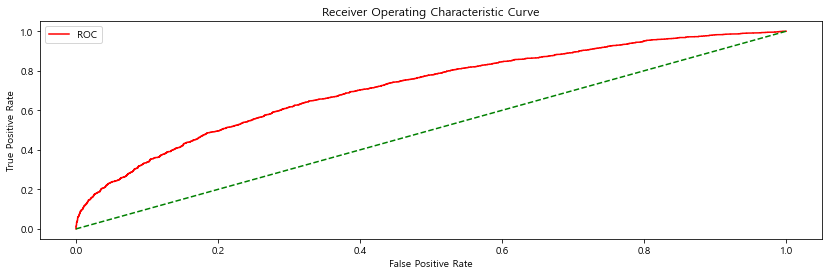

In [41]:
# ROC 곡선 시각화

prob_cat = cat.predict_proba(valid_X)
probs_cat = prob_cat[:, 1]
fper, tper, thresholds = roc_curve(valid_y, probs_cat)
plot_roc_curve(fper, tper)

## ROC-AUC 점수

auc_cat = roc_auc_score(valid_y, cat.predict_proba(valid_X)[:,1])
auc_cat

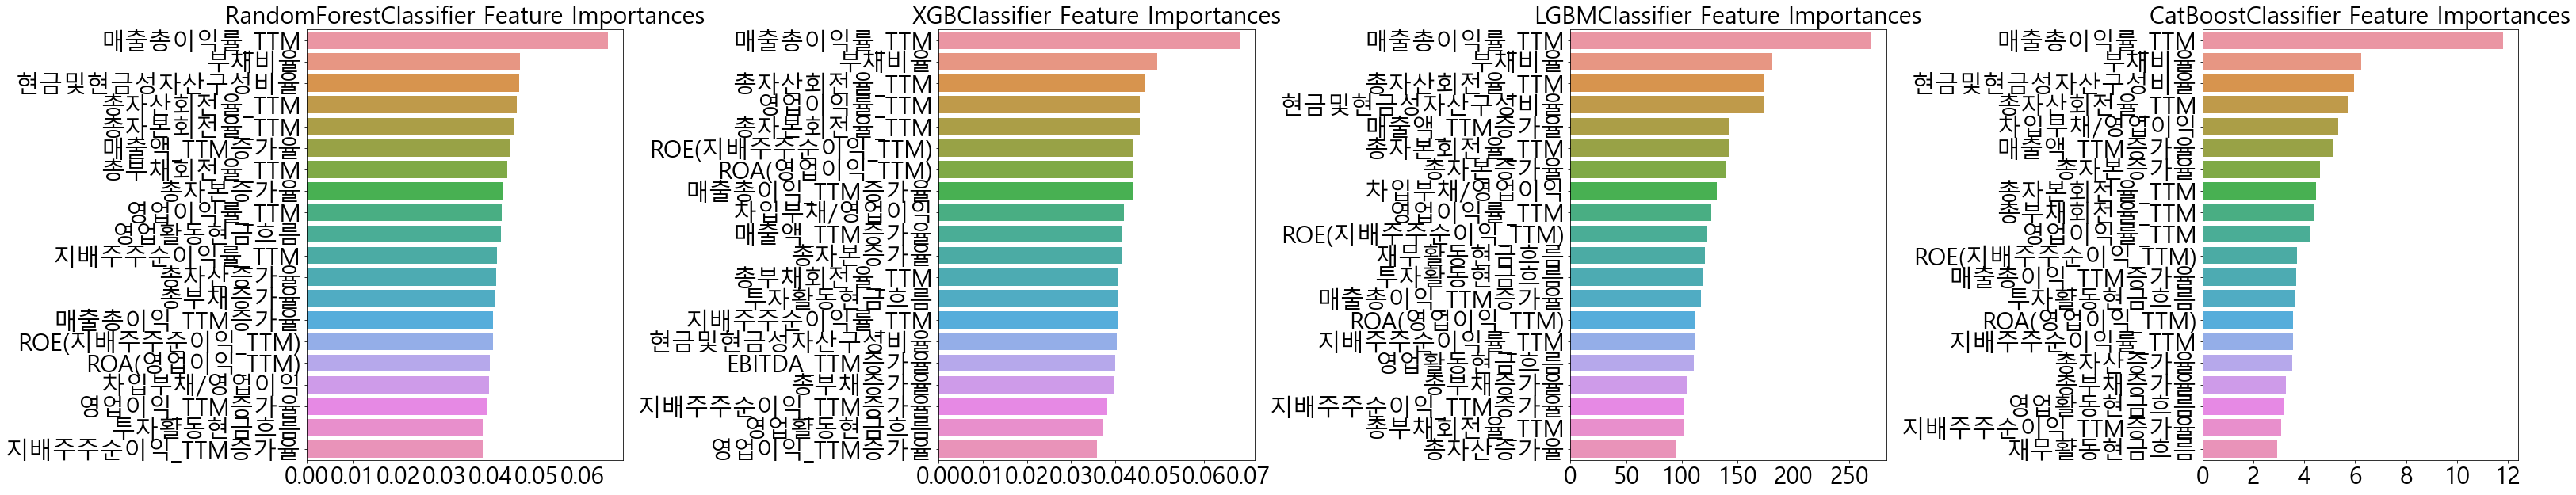

In [42]:
train_X = pd.DataFrame(train_X , columns = train_X.columns)
mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['font.size'] = 10
plt.rcParams['figure.figsize'] = (14,4)
# 모델의 중요도 상위 20개의 피처명과 그때의 중요도값을 Series로 반환.
def get_top_features(model):
    ftr_importances_values = model.feature_importances_
    ftr_importances = pd.Series(ftr_importances_values, index=train_X.columns  )
    ftr_top20 = ftr_importances.sort_values(ascending=False)[:20]
    return ftr_top20
def visualize_ftr_importances(models):
    # 3개 분류 모델의 시각화를 위해 3개의 컬럼을 가지는 subplot 생성
    fig, axs = plt.subplots(figsize=(50,10),nrows=1, ncols=4)
    plt.subplots_adjust(wspace = 1)
    # 입력인자로 받은 list객체인 models에서 차례로 model을 추출하여 피처 중요도 시각화. 
    for i_num, model in enumerate(models):
        # 중요도 상위 20개의 피처명과 그때의 중요도값 추출 
        ftr_top20 = get_top_features(model)
        axs[i_num].set_title(model.__class__.__name__+' Feature Importances', size=30)
        #font 크기 조정.
        for label in (axs[i_num].get_xticklabels() + axs[i_num].get_yticklabels()):
            label.set_fontsize(30)
        sns.barplot(x=ftr_top20.values, y=ftr_top20.index , ax=axs[i_num])



models = [rfc_opt,xgb_opt,lgbm_opt,cat]
visualize_ftr_importances(models)

VOTING

In [43]:
from sklearn.ensemble import VotingClassifier

#개별모델 생성

rfc_opt = RandomForestClassifier(random_state=42)
xgb_opt = XGBClassifier(random_state = 42)
lgbm_opt = LGBMClassifier(random_state = 42)
cat = CatBoostClassifier(random_state = 42)
#개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현
vo_clf= VotingClassifier(estimators = [('RFC',rfc_opt),('XGB',xgb_opt),('LGBM',lgbm_opt),('CAT',cat)],voting='soft')



#VotingClassifier 학습/예측/평가
vo_clf.fit(train_X,train_y)
pred=vo_clf.predict(valid_X)

get_clf_eval(valid_y,vo_clf,pred)


Learning rate set to 0.039731
0:	learn: 0.6897141	total: 8.21ms	remaining: 8.2s
1:	learn: 0.6866613	total: 16.4ms	remaining: 8.18s
2:	learn: 0.6838144	total: 24.3ms	remaining: 8.06s
3:	learn: 0.6812248	total: 32.5ms	remaining: 8.08s
4:	learn: 0.6787114	total: 40.7ms	remaining: 8.09s
5:	learn: 0.6763739	total: 49.3ms	remaining: 8.16s
6:	learn: 0.6741141	total: 57.4ms	remaining: 8.14s
7:	learn: 0.6722297	total: 65.5ms	remaining: 8.12s
8:	learn: 0.6702733	total: 73.4ms	remaining: 8.08s
9:	learn: 0.6684500	total: 81.4ms	remaining: 8.06s
10:	learn: 0.6667756	total: 88.9ms	remaining: 7.99s
11:	learn: 0.6653010	total: 96.7ms	remaining: 7.96s
12:	learn: 0.6637731	total: 104ms	remaining: 7.91s
13:	learn: 0.6623548	total: 112ms	remaining: 7.91s
14:	learn: 0.6609325	total: 120ms	remaining: 7.9s
15:	learn: 0.6598293	total: 128ms	remaining: 7.87s
16:	learn: 0.6585100	total: 135ms	remaining: 7.83s
17:	learn: 0.6574447	total: 143ms	remaining: 7.82s
18:	learn: 0.6564125	total: 151ms	remaining: 7.79s
1

179:	learn: 0.6085620	total: 1.5s	remaining: 6.85s
180:	learn: 0.6084098	total: 1.51s	remaining: 6.84s
181:	learn: 0.6082003	total: 1.52s	remaining: 6.84s
182:	learn: 0.6080059	total: 1.53s	remaining: 6.83s
183:	learn: 0.6077872	total: 1.54s	remaining: 6.82s
184:	learn: 0.6075458	total: 1.54s	remaining: 6.8s
185:	learn: 0.6073474	total: 1.55s	remaining: 6.79s
186:	learn: 0.6072269	total: 1.56s	remaining: 6.78s
187:	learn: 0.6070896	total: 1.57s	remaining: 6.78s
188:	learn: 0.6068858	total: 1.58s	remaining: 6.77s
189:	learn: 0.6066598	total: 1.59s	remaining: 6.76s
190:	learn: 0.6064618	total: 1.6s	remaining: 6.76s
191:	learn: 0.6062939	total: 1.6s	remaining: 6.75s
192:	learn: 0.6061369	total: 1.61s	remaining: 6.74s
193:	learn: 0.6059936	total: 1.62s	remaining: 6.74s
194:	learn: 0.6058774	total: 1.63s	remaining: 6.73s
195:	learn: 0.6057376	total: 1.64s	remaining: 6.72s
196:	learn: 0.6055286	total: 1.65s	remaining: 6.71s
197:	learn: 0.6053363	total: 1.65s	remaining: 6.7s
198:	learn: 0.605

359:	learn: 0.5754802	total: 3.01s	remaining: 5.35s
360:	learn: 0.5752731	total: 3.02s	remaining: 5.34s
361:	learn: 0.5750804	total: 3.03s	remaining: 5.33s
362:	learn: 0.5749083	total: 3.03s	remaining: 5.33s
363:	learn: 0.5747486	total: 3.04s	remaining: 5.32s
364:	learn: 0.5746612	total: 3.05s	remaining: 5.31s
365:	learn: 0.5745398	total: 3.06s	remaining: 5.3s
366:	learn: 0.5743670	total: 3.06s	remaining: 5.29s
367:	learn: 0.5741662	total: 3.07s	remaining: 5.28s
368:	learn: 0.5740457	total: 3.08s	remaining: 5.27s
369:	learn: 0.5738938	total: 3.09s	remaining: 5.26s
370:	learn: 0.5736962	total: 3.1s	remaining: 5.25s
371:	learn: 0.5735847	total: 3.1s	remaining: 5.24s
372:	learn: 0.5734163	total: 3.11s	remaining: 5.23s
373:	learn: 0.5732092	total: 3.12s	remaining: 5.22s
374:	learn: 0.5730705	total: 3.13s	remaining: 5.22s
375:	learn: 0.5729007	total: 3.14s	remaining: 5.21s
376:	learn: 0.5727383	total: 3.15s	remaining: 5.2s
377:	learn: 0.5725696	total: 3.15s	remaining: 5.19s
378:	learn: 0.57

518:	learn: 0.5481513	total: 4.31s	remaining: 4s
519:	learn: 0.5479380	total: 4.32s	remaining: 3.99s
520:	learn: 0.5477462	total: 4.33s	remaining: 3.98s
521:	learn: 0.5476419	total: 4.34s	remaining: 3.97s
522:	learn: 0.5473908	total: 4.34s	remaining: 3.96s
523:	learn: 0.5472553	total: 4.35s	remaining: 3.95s
524:	learn: 0.5470893	total: 4.36s	remaining: 3.94s
525:	learn: 0.5469433	total: 4.37s	remaining: 3.94s
526:	learn: 0.5467530	total: 4.38s	remaining: 3.93s
527:	learn: 0.5466280	total: 4.39s	remaining: 3.92s
528:	learn: 0.5465100	total: 4.39s	remaining: 3.91s
529:	learn: 0.5463726	total: 4.4s	remaining: 3.9s
530:	learn: 0.5461506	total: 4.41s	remaining: 3.9s
531:	learn: 0.5459602	total: 4.42s	remaining: 3.89s
532:	learn: 0.5458212	total: 4.43s	remaining: 3.88s
533:	learn: 0.5456747	total: 4.43s	remaining: 3.87s
534:	learn: 0.5455522	total: 4.44s	remaining: 3.86s
535:	learn: 0.5454007	total: 4.45s	remaining: 3.85s
536:	learn: 0.5452003	total: 4.46s	remaining: 3.84s
537:	learn: 0.5450

686:	learn: 0.5228150	total: 6.04s	remaining: 2.75s
687:	learn: 0.5226623	total: 6.05s	remaining: 2.74s
688:	learn: 0.5225564	total: 6.06s	remaining: 2.73s
689:	learn: 0.5224373	total: 6.07s	remaining: 2.73s
690:	learn: 0.5223082	total: 6.08s	remaining: 2.72s
691:	learn: 0.5221908	total: 6.09s	remaining: 2.71s
692:	learn: 0.5220770	total: 6.1s	remaining: 2.7s
693:	learn: 0.5219024	total: 6.11s	remaining: 2.69s
694:	learn: 0.5217708	total: 6.12s	remaining: 2.69s
695:	learn: 0.5216574	total: 6.13s	remaining: 2.68s
696:	learn: 0.5215274	total: 6.14s	remaining: 2.67s
697:	learn: 0.5213850	total: 6.15s	remaining: 2.66s
698:	learn: 0.5212185	total: 6.16s	remaining: 2.65s
699:	learn: 0.5210758	total: 6.17s	remaining: 2.65s
700:	learn: 0.5209543	total: 6.18s	remaining: 2.64s
701:	learn: 0.5208293	total: 6.19s	remaining: 2.63s
702:	learn: 0.5207025	total: 6.2s	remaining: 2.62s
703:	learn: 0.5205905	total: 6.21s	remaining: 2.61s
704:	learn: 0.5204574	total: 6.22s	remaining: 2.6s
705:	learn: 0.52

849:	learn: 0.5008333	total: 7.77s	remaining: 1.37s
850:	learn: 0.5007181	total: 7.78s	remaining: 1.36s
851:	learn: 0.5005817	total: 7.79s	remaining: 1.35s
852:	learn: 0.5004388	total: 7.8s	remaining: 1.34s
853:	learn: 0.5003197	total: 7.81s	remaining: 1.33s
854:	learn: 0.5001774	total: 7.82s	remaining: 1.32s
855:	learn: 0.5000569	total: 7.83s	remaining: 1.32s
856:	learn: 0.4999159	total: 7.84s	remaining: 1.31s
857:	learn: 0.4997536	total: 7.85s	remaining: 1.3s
858:	learn: 0.4996329	total: 7.85s	remaining: 1.29s
859:	learn: 0.4995340	total: 7.86s	remaining: 1.28s
860:	learn: 0.4993913	total: 7.87s	remaining: 1.27s
861:	learn: 0.4992966	total: 7.88s	remaining: 1.26s
862:	learn: 0.4991260	total: 7.89s	remaining: 1.25s
863:	learn: 0.4990116	total: 7.9s	remaining: 1.24s
864:	learn: 0.4989194	total: 7.91s	remaining: 1.23s
865:	learn: 0.4988258	total: 7.92s	remaining: 1.23s
866:	learn: 0.4986858	total: 7.93s	remaining: 1.22s
867:	learn: 0.4985671	total: 7.93s	remaining: 1.21s
868:	learn: 0.4

0.746250053519111

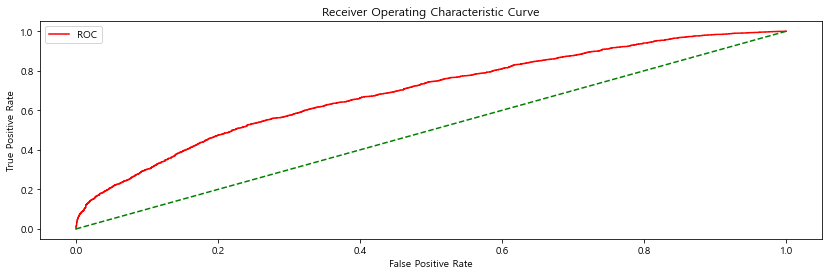

In [44]:
prob_vo = vo_clf.predict_proba(valid_X)
probs_vo = prob_vo[:, 1]
fper, tper, thresholds = roc_curve(valid_y, probs_lgbm)
plot_roc_curve(fper, tper)

## ROC-AUC 점수

auc_vo = roc_auc_score(valid_y, vo_clf.predict_proba(valid_X)[:,1])
auc_vo

랜덤포레스트 모델의 성능이 가장 좋았음

# shap

In [48]:
import shap
## 개발한 모델(XGBoost)을 SHAP에 적합
shap.initjs()
explainer = shap.TreeExplainer(rfc_opt)
shap_values = explainer.shap_values(valid_X.iloc[0])

In [49]:
## 개별 데이터 예측 예시 (1) 상승 예측
shap.initjs() 
shap.force_plot(explainer.expected_value[0], shap_values[0], valid_X.iloc[0])

In [50]:
## 변수 중요도 및 영향
shap.initjs()
shap.summary_plot(shap_values[0], valid_X)

AssertionError: Summary plots need a matrix of shap_values, not a vector.

# 테스트 데이터 검증

In [51]:
test

,Name,DATE,업종,수정PBR,부채비율,현금및현금성자산구성비율,영업이익률_TTM,지배주주순이익률_TTM,ROA(영업이익_TTM),ROE(지배주주순이익_TTM),...,차입부채/영업이익,매출총이익률_TTM,총자산회전율_TTM,총부채회전율_TTM,총자본회전율_TTM,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름,earning,target
0,삼성전자,20191Q,하드웨어,1.24,36.27,7.73,21.00,15.87,15.05,16.21,...,26.687745,43.448553,68.274464,256.490190,93.040739,89.183476,-19.294989,-78.876606,-5,1
12,SK하이닉스,20191Q,반도체,1.09,38.09,1.77,46.35,35.13,31.23,32.38,...,40.917453,58.724956,59.108157,214.288736,81.622407,98.997686,-1.398546,-108.930660,-5,0
24,LG화학,20191Q,소재,1.66,81.47,9.93,6.64,4.02,6.51,6.83,...,368.006758,18.331413,90.512710,201.606345,164.257265,104.040196,78.950721,-175.637095,-2,1
36,삼성SDI,20191Q,하드웨어,1.22,58.85,7.03,7.97,6.55,4.24,5.35,...,472.398438,22.974957,48.856142,131.867903,77.610171,37.495422,140.075304,-134.527243,1,1
48,현대차,20191Q,자동차 및 부품,0.48,146.15,4.90,2.61,1.70,1.43,2.44,...,2927.404477,15.846669,53.848785,90.692753,132.550724,65.514587,15.752689,-69.722650,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22932,참존글로벌,20193Q,자본재,0.07,169.66,4.30,-100.01,-199.69,-10.72,-49.17,...,-580.425202,38.146482,9.180024,14.590886,24.754777,74.136276,-153.037033,109.804373,9,0
22944,에이치엔티,20193Q,하드웨어,3.92,139.50,13.32,2.54,-5.01,4.36,-18.96,...,626.738780,8.880155,156.908851,269.388058,375.797200,-179.413707,-502.132256,741.129147,5,0
22956,파티게임즈,20193Q,소프트웨어,0.58,215.17,14.78,-2.55,25.88,-0.98,29.23,...,-2145.502841,100.000000,44.288140,64.870580,139.584875,35.372352,-96.632464,90.665848,5,0
22968,맘스터치,20193Q,소비자 서비스,3.19,65.54,18.14,7.11,6.45,14.52,22.38,...,109.913658,27.982087,192.737850,486.809085,319.060573,134.564970,-68.292379,-27.913298,1,1


종속/독립변수 분리 및 스케일링

In [52]:
test_X = test.drop(['Name','DATE','업종','수정PBR','target'],axis=1)
test_y = test['target']


test_X[scale_col] = mMscaler.transform(test_X[scale_col])

테스트 성능 평가

In [58]:
from sklearn.metrics import *


                  

rfc_opt = RandomForestClassifier(random_state=42)
# xgb_opt = XGBClassifier(random_state = 42)
# lgbm_opt = LGBMClassifier(random_state = 42)     
# cat = CatBoostClassifier(random_state = 42)
# #개별 모델을 소프트 보팅 기반의 앙상블 모델로 구현
# vo_clf= VotingClassifier(estimators = [('RFC',rfc_opt),('XGB',xgb_opt),('LGBM',lgbm_opt),('CAT',cat)],voting='soft')

rfc_opt.fit(train_X,train_y)

            
pred_opt = rfc_opt.predict(test_X)

get_clf_eval(test_y,rfc_opt,pred_opt)

[[2648  333]
 [1116  482]]
-------RandomForestClassifier ------- 
정확도: 0.6836, 정밀도: 0.5914, 재현율: 0.3016, f1_score: 0.3995


In [59]:
test_df = test.copy()
test_df['pred_y'] = pred_opt

In [60]:
test_df

,Name,DATE,업종,수정PBR,부채비율,현금및현금성자산구성비율,영업이익률_TTM,지배주주순이익률_TTM,ROA(영업이익_TTM),ROE(지배주주순이익_TTM),...,매출총이익률_TTM,총자산회전율_TTM,총부채회전율_TTM,총자본회전율_TTM,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름,earning,target,pred_y
0,삼성전자,20191Q,하드웨어,1.24,36.27,7.73,21.00,15.87,15.05,16.21,...,43.448553,68.274464,256.490190,93.040739,89.183476,-19.294989,-78.876606,-5,1,0
12,SK하이닉스,20191Q,반도체,1.09,38.09,1.77,46.35,35.13,31.23,32.38,...,58.724956,59.108157,214.288736,81.622407,98.997686,-1.398546,-108.930660,-5,0,0
24,LG화학,20191Q,소재,1.66,81.47,9.93,6.64,4.02,6.51,6.83,...,18.331413,90.512710,201.606345,164.257265,104.040196,78.950721,-175.637095,-2,1,0
36,삼성SDI,20191Q,하드웨어,1.22,58.85,7.03,7.97,6.55,4.24,5.35,...,22.974957,48.856142,131.867903,77.610171,37.495422,140.075304,-134.527243,1,1,1
48,현대차,20191Q,자동차 및 부품,0.48,146.15,4.90,2.61,1.70,1.43,2.44,...,15.846669,53.848785,90.692753,132.550724,65.514587,15.752689,-69.722650,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22932,참존글로벌,20193Q,자본재,0.07,169.66,4.30,-100.01,-199.69,-10.72,-49.17,...,38.146482,9.180024,14.590886,24.754777,74.136276,-153.037033,109.804373,9,0,0
22944,에이치엔티,20193Q,하드웨어,3.92,139.50,13.32,2.54,-5.01,4.36,-18.96,...,8.880155,156.908851,269.388058,375.797200,-179.413707,-502.132256,741.129147,5,0,0
22956,파티게임즈,20193Q,소프트웨어,0.58,215.17,14.78,-2.55,25.88,-0.98,29.23,...,100.000000,44.288140,64.870580,139.584875,35.372352,-96.632464,90.665848,5,0,0
22968,맘스터치,20193Q,소비자 서비스,3.19,65.54,18.14,7.11,6.45,14.52,22.38,...,27.982087,192.737850,486.809085,319.060573,134.564970,-68.292379,-27.913298,1,1,0


In [61]:
test_df['target'].value_counts()

0    2981
1    1598
Name: target, dtype: int64

In [62]:
test_df['pred_y'].value_counts()

0    3764
1     815
Name: pred_y, dtype: int64

In [63]:
## 랜덤포레스트 모델이 지속상승으로 예측한 것
df_stat = test_df[test_df['pred_y'] == 1]

In [64]:
df_stat

,Name,DATE,업종,수정PBR,부채비율,현금및현금성자산구성비율,영업이익률_TTM,지배주주순이익률_TTM,ROA(영업이익_TTM),ROE(지배주주순이익_TTM),...,매출총이익률_TTM,총자산회전율_TTM,총부채회전율_TTM,총자본회전율_TTM,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름,earning,target,pred_y
36,삼성SDI,20191Q,하드웨어,1.22,58.85,7.03,7.97,6.55,4.24,5.35,...,22.974957,48.856142,131.867903,77.610171,37.495422,140.075304,-134.527243,1,1,1
120,KB금융,20191Q,은행,0.47,1269.62,0.53,9.52,6.66,0.89,8.46,...,63.534840,2.891026,3.118733,39.596152,96.518352,95.088718,-204.598749,1,1,1
144,신한지주,20191Q,은행,0.55,1231.45,0.00,17.75,12.32,0.98,9.38,...,62.457113,2.774084,2.999354,36.935553,-113.970981,462.974755,-333.005195,3,1,1
192,LG전자,20191Q,내구 소비재 및 의류,0.91,171.18,8.91,4.08,1.79,5.73,7.59,...,24.563248,133.082441,210.827416,360.890554,122.919984,21.838447,-133.964213,-3,1,1
204,삼성생명,20191Q,보험,0.50,794.79,1.51,7.97,5.29,0.89,5.77,...,61.038433,5.423791,6.106206,48.531779,313.775599,-3.108533,-263.107094,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22224,금호전기,20193Q,디스플레이,0.28,320.36,1.86,-39.38,-103.59,-8.93,-87.67,...,4.434530,46.151128,60.557156,194.000804,14.080621,62.127619,-79.294420,-8,0,1
22620,스카이문스테크놀로지,20193Q,하드웨어,0.72,31.48,39.43,-165.90,-180.84,-25.89,-42.99,...,22.285348,23.693389,98.968723,31.151033,39.678405,153.900884,-147.473955,-11,0,1
22740,우리금융캐피탈,20193Q,기타금융,0.80,799.82,1.91,17.66,14.27,1.87,13.06,...,100.000000,3.035851,3.415417,27.317249,-867.866583,845.877732,-1.609736,3,1,1
22824,레드로버,20193Q,미디어,0.46,52.06,0.17,-271.64,-553.52,-28.60,-71.28,...,-78.276146,13.819445,40.367144,21.013177,6.163285,-16.788598,12.031082,-5,0,1


In [105]:
## 수익률 계산할 날짜 20193Q에 1(지속상승)으로 예측된다면 20194Q에 구매하여 3년동안의 수익률을 볼 예정
test_date = '20193Q' 

In [106]:
bh_list = df_stat[(df_stat['pred_y'] == 1) & (df_stat['DATE'] == test_date)]['Name'].unique()

In [107]:
print(bh_list)

['SK하이닉스' 'NAVER' '카카오' '셀트리온' 'KB금융' '신한지주' 'LG전자' '삼성생명' '하나금융지주'
 '셀트리온헬스케어' 'S-Oil' '한화솔루션' 'LG생활건강' 'KT' '기업은행' '아모레퍼시픽' '강원랜드' '메리츠화재'
 '메리츠금융지주' '한온시스템' '오리온' '코웨이' 'DB손해보험' '두산밥캣' '메리츠증권' 'BGF리테일' '롯데지주'
 'NH투자증권' '한국금융지주' 'GS리테일' '삼성증권' '현대해상' '셀트리온제약' '에스원' '아모레G' '키움증권' 'CJ'
 '한미사이언스' '영원무역' '한화생명' '휠라홀딩스' '알테오젠' '대웅제약' '오스템임플란트' '현대백화점' '롯데칠성'
 'DGB금융지주' '현대건설기계' '대웅' '아프리카TV' '종근당' '아이에스동서' '코리안리' 'F&F홀딩스' '다우데이타'
 '메가스터디교육' '더블유게임즈' '다우기술' '네오위즈' '신세계인터내셔날' '동양생명' 'NHN' '선광' '삼천당제약'
 '녹십자홀딩스' 'NICE평가정보' 'CJ CGV' '한올바이오파마' '보령' '대신증권' '동국제약' '대한해운' '쿠쿠홈시스'
 '우리종금' '골프존' '안랩' '다원시스' '위메이드맥스' 'SPC삼립' '솔브레인홀딩스' '쿠쿠홀딩스' '데브시스터즈'
 '한화투자증권' '동원F&B' '유안타증권' '헬릭스미스' '경동나비엔' '바텍' 'NICE' '코웰패션' 'LF' '한화손해보험'
 '매일유업' '한국자산신탁' '신흥에스이씨' '다날' '서흥' '대원제약' '휴온스' 'KG이니시스' '잇츠한불' '교보증권'
 '이연제약' '바이넥스' '일양약품' '도화엔지니어링' 'SM C&C' '디오' '사람인에이치알' '뷰웍스' '한국기업평가'
 'KG케미칼' 'SK증권' '광동제약' '현대차증권' 'HLB글로벌' '조이시티' '미코' '아주IB투자' '나스미디어'
 'AJ네트웍스' '네오위즈홀딩스' '유틸렉스' '케이아이엔엑스' '나이스정보통신' '종근당홀딩스' '시너지이노베이션'


지속상승 종목들의 3년 수익률

In [ ]:
valid_data = valid_data.drop_duplicates(subset = ['Name','DATE'],keep = 'first')

In [110]:
valid_data = df_test[df_test['Name'].isin(bh_list)]
rate = rate_of_return(valid_data,'20194Q','20223Q')
rate = np.where(rate == 0, np.nan, rate)
np.array([x for x in rate if not np.isnan(x)]).mean()

0.04295975338053462

모든 종목들의 3년 수익률

In [111]:
rate = rate_of_return(df_test,'20194Q','20223Q')
rate = np.where(rate == 0, np.nan, rate)
np.array([x for x in rate if not np.isnan(x)]).mean()

0.14682004581085126

시장 수익률 : 코스피 : 4.48 / 코스닥 : 8.18

가치평가 기준으로 S인 그룹의 수익률 : 40%

In [115]:
a = df_var[df_var['DATE'] == '20193Q']

b = a[a['Name'].isin(bh_list)]

x = valid_data[valid_data['DATE'] == '20194Q' ]['수정주가(보통)']

y = valid_data[(valid_data['DATE'] == '20223Q')]['수정주가(보통)']

In [116]:
v = (y.values-x.values)/x.values
v = np.where(v == 0, np.nan, v)

In [117]:
b['수익률'] = v
b.groupby('SMB').describe()['수익률']


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,count,mean,std,min,25%,50%,75%,max
SMB,,,,,,,,
B,179.0,-0.043696,0.419373,-0.783878,-0.291307,-0.099511,0.088044,2.214565
S,83.0,0.229844,1.024892,-0.835172,-0.279371,0.032532,0.302191,5.132530


## 지속상승으로 예측된 종목들의 미래 재무제표 추세

In [128]:
s_group = list(b[(b['SMB'] == 'S')]['Name'].values)

In [129]:
s_group

['선광',
 '위메이드맥스',
 '데브시스터즈',
 'HLB글로벌',
 '조이시티',
 '시너지이노베이션',
 '한일사료',
 '한국정보인증',
 '플래스크',
 '셀루메드',
 '세종메디칼',
 '액션스퀘어',
 '케이프',
 '디아이',
 '엠게임',
 '케어랩스',
 '디케이티',
 '가비아',
 '싸이맥스',
 '골든센츄리',
 '로보로보',
 '현대이지웰',
 'SCI평가정보',
 '알에스오토메이션',
 'SV인베스트먼트',
 '휴비츠',
 '조광ILI',
 '아가방컴퍼니',
 '팜젠사이언스',
 '내츄럴엔도텍',
 '이스트소프트',
 '흥국에프엔비',
 '에너토크',
 '에이티세미콘',
 '한국전자인증',
 '이엠넷',
 'KTcs',
 'CNH',
 '큐로컴',
 'NHN벅스',
 '명문제약',
 '오픈베이스',
 '오리콤',
 '지니언스',
 '모베이스',
 '일신바이오',
 '플레이그램',
 '하이소닉',
 '한일화학',
 '오리엔트바이오',
 '명성티엔에스',
 '블루콤',
 '한국가구',
 '바른손이앤에이',
 '자이글',
 '에이프로젠 H&G',
 '이글루',
 '포시에스',
 '아시아경제',
 '알티캐스트',
 'MH에탄올',
 '이상네트웍스',
 '인산가',
 '한국전자홀딩스',
 '상지카일룸',
 '리더스코스메틱',
 '삼영이엔씨',
 '린드먼아시아',
 '대한과학',
 '배럴',
 '이노인스트루먼트',
 '시큐브',
 '크로바하이텍',
 '한국유니온제약',
 '백금T&A',
 '세중',
 '원림',
 '미래아이앤지',
 '오가닉티코스메틱',
 '지란지교시큐리티',
 '씨케이에이치',
 '진바이오텍',
 '금호전기',
 '스카이문스테크놀로지',
 '레드로버',
 '지유온']

In [143]:
df_earn = df_test[df_test['Name'].isin(s_group)]

In [152]:
df_매출액 = pd.pivot_table(df, index='DATE', columns="Name", values='매출액')
df_순이익 = pd.pivot_table(df, index='DATE', columns="Name", values='지배주주순이익')
df_매출총이익 = pd.pivot_table(df, index='DATE', columns="Name", values= '매출총이익')

In [153]:
df_매출액 = df_매출액.rolling(window=4).sum()
df_순이익 = df_순이익.rolling(window=4).sum()
df_매출총이익 = df_매출총이익.rolling(window=4).sum()

In [154]:
df_매출액

Name,3S,3노드디지탈,AD모터스,AJS,AJ네트웍스,AK홀딩스,APS홀딩스,AP시스템,AP위성,BGF,...,휴온스글로벌,휴젤,흥구석유,흥국,흥국에프엔비,흥국화재,흥아해운,희림,희훈디앤지,힘스
DATE,,,,,,,,,,,,,,,,,,,,,
20101Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20102Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20103Q,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20104Q,NaN,3.657947e+11,5.032724e+09,5.683280e+10,1.117128e+11,NaN,NaN,NaN,NaN,NaN,...,1.008674e+11,NaN,2.417825e+11,NaN,NaN,2.369292e+12,NaN,1.603974e+11,3.579659e+10,NaN
20111Q,NaN,3.652585e+11,6.377377e+09,6.012834e+10,1.162427e+11,NaN,NaN,NaN,NaN,NaN,...,1.033256e+11,NaN,2.593995e+11,NaN,NaN,2.425240e+12,NaN,1.541362e+11,2.226983e+10,NaN
20112Q,NaN,3.699694e+11,5.983724e+09,5.586032e+10,1.234354e+11,NaN,NaN,NaN,NaN,NaN,...,1.051861e+11,NaN,2.539828e+11,NaN,NaN,2.470113e+12,NaN,1.477884e+11,8.504145e+09,NaN
20113Q,NaN,3.333410e+11,5.677898e+09,5.092199e+10,1.287377e+11,NaN,NaN,NaN,NaN,NaN,...,1.085712e+11,NaN,2.585782e+11,NaN,NaN,2.533760e+12,NaN,1.392060e+11,3.720553e+09,NaN
20114Q,NaN,3.535280e+11,5.667897e+09,5.066565e+10,1.329556e+11,NaN,NaN,NaN,NaN,NaN,...,1.066259e+11,NaN,2.614066e+11,NaN,NaN,2.630791e+12,NaN,1.350666e+11,1.494761e+09,NaN
20121Q,NaN,3.476736e+11,4.129751e+09,4.288041e+10,1.366003e+11,NaN,NaN,NaN,NaN,NaN,...,1.130479e+11,NaN,2.606903e+11,NaN,NaN,2.743814e+12,NaN,1.333489e+11,NaN,NaN


In [155]:
drop_date = list(df_매출액.index[:-13])

In [156]:
drop_date

['20101Q',
 '20102Q',
 '20103Q',
 '20104Q',
 '20111Q',
 '20112Q',
 '20113Q',
 '20114Q',
 '20121Q',
 '20122Q',
 '20123Q',
 '20124Q',
 '20131Q',
 '20132Q',
 '20133Q',
 '20134Q',
 '20141Q',
 '20142Q',
 '20143Q',
 '20144Q',
 '20151Q',
 '20152Q',
 '20153Q',
 '20154Q',
 '20161Q',
 '20162Q',
 '20163Q',
 '20164Q',
 '20171Q',
 '20172Q',
 '20173Q',
 '20174Q',
 '20181Q',
 '20182Q',
 '20183Q',
 '20184Q',
 '20191Q',
 '20192Q',
 '20193Q']

In [157]:
drop_date.append('20224Q')

In [158]:
df_sales = df_매출액.copy()
df_oper = df_순이익.copy()
df_gross_sales = df_매출총이익.copy()
# def processing(df1,df2,df3,drop_date):

# TTM을 증가율로 변환
df_sales = increase_rate(df_sales)
df_oper = increase_rate(df_oper)
df_gross_sales = increase_rate(df_gross_sales)

# 세 변수를 가지는 공통 종목으로 설정
col_list = list(set(df_sales.columns)&set(df_oper.columns)&set(df_gross_sales.columns))
col_list.sort()
df_sales = df_sales[col_list]
df_oper = df_oper[col_list]
df_gross_sales = df_gross_sales[col_list]

# 증가율을 이익성장레이블링으로 카테고리화
df_sales_label = process(df_sales)
df_oper_label = process(df_oper)
df_gross_sales_label = process(df_gross_sales)

# 매출액 이익성장레이블과 영업이익 이익성장레이블을 합하여 데이터 구축
df_fin_label = df_sales_label.add(df_oper_label).add(df_gross_sales_label)
df_cumsum = df_fin_label.cumsum()

In [159]:
df_cumsum

Name,AJ네트웍스,AK홀딩스,APS홀딩스,AP시스템,AP위성,BGF,BGF리테일,BNGT,BNK금융지주,BYC,...,휴온스,휴온스글로벌,휴젤,흥구석유,흥국,흥국에프엔비,흥국화재,흥아해운,희림,힘스
DATE,,,,,,,,,,,,,,,,,,,,,
20194Q,-6,-2,-5,3,12,-11,3,4,-1,0,...,1,-3,-4,-4,-2,1,0,2,3,3
20201Q,-14,-11,0,9,10,-20,4,5,-4,-5,...,4,-3,-8,-6,-1,-1,0,-7,2,5
20202Q,-16,-20,-3,4,11,-31,3,7,-8,-2,...,7,0,-9,-11,2,-4,1,-1,3,17
20203Q,-22,-26,2,13,9,-28,6,7,-12,-7,...,10,3,-8,-17,5,-9,1,-3,6,21
20204Q,-17,-29,0,14,0,-17,5,8,-11,-7,...,14,7,-4,-16,10,-10,5,-2,8,16
20211Q,-17,-32,3,15,-6,-13,8,12,-10,-3,...,15,10,2,-17,14,-6,9,-1,11,4
20212Q,-10,-26,7,19,-12,-12,11,16,-7,-8,...,16,11,6,-15,16,-3,10,-6,14,-11
20213Q,-3,-27,10,17,-15,-15,12,24,-4,-5,...,19,12,7,-12,15,2,11,-4,12,-7
20214Q,1,-26,22,19,-6,-6,15,39,-3,-2,...,19,12,4,-12,11,5,10,8,15,-16


<AxesSubplot:title={'center':'이익성장레이블링(누적합)'}, xlabel='DATE'>

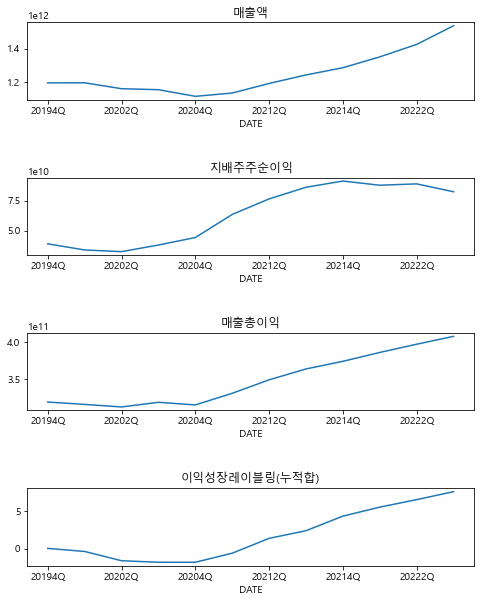

In [160]:
fig,ax = plt.subplots(4,1)
fig.set_size_inches((8,10))
plt.subplots_adjust(wspace = 0.3,hspace = 1)

df_매출액.mean(axis =1).drop(drop_date,axis = 0).plot(ax= ax[0],title = '매출액')
df_순이익.mean(axis =1).drop(drop_date,axis = 0).plot(ax = ax[1],title = '지배주주순이익')
df_매출총이익.mean(axis =1).drop(drop_date,axis = 0).plot(ax = ax[2],title = '매출총이익')
df_cumsum.mean(axis =1).plot(ax = ax[3],title = '이익성장레이블링(누적합)')

# 제일 최근 분기 예측해보기

In [161]:
test_2022 = df_train[df_train['DATE'] == '20222Q']

In [162]:
test_2022['SMB'] = test_2022['시가총액'].apply(lambda x : 'S' if x <= test_2022['시가총액'].median()
                                                        else 'B')


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [163]:
import numpy as np
test_2022[['매출액_TTM증가율','매출총이익_TTM증가율','수정EPS증가율']] = test_2022[['매출액_TTM증가율','매출총이익_TTM증가율','수정EPS증가율']].astype('float64')

test_2022 = test_2022[['Name','DATE','업종','수정PBR','부채비율', '현금및현금성자산구성비율',
       '영업이익률_TTM', '지배주주순이익률_TTM', 'ROA(영업이익_TTM)','ROE(지배주주순이익_TTM)',
       '매출액_TTM증가율', '영업이익_TTM증가율', '매출총이익_TTM증가율', 'EBITDA_TTM증가율',
       '지배주주순이익_TTM증가율', '총자본증가율', '총자산증가율', '총부채증가율', '수정EPS증가율', '차입부채/영업이익',
        '매출총이익률_TTM', '총자산회전율_TTM', '총부채회전율_TTM', '총자본회전율_TTM',
       '영업활동현금흐름', '재무활동현금흐름', '투자활동현금흐름','SMB','earning']]

test_2022 = test_2022.replace([np.inf, -np.inf], np.nan)

test_2022 = test_2022.dropna(axis=0)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [164]:
test_2022_x = test_2022.drop(['Name','DATE','업종','SMB','수정PBR'],axis=1)

In [165]:
test_2022_x

,부채비율,현금및현금성자산구성비율,영업이익률_TTM,지배주주순이익률_TTM,ROA(영업이익_TTM),ROE(지배주주순이익_TTM),매출액_TTM증가율,영업이익_TTM증가율,매출총이익_TTM증가율,EBITDA_TTM증가율,...,수정EPS증가율,차입부채/영업이익,매출총이익률_TTM,총자산회전율_TTM,총부채회전율_TTM,총자본회전율_TTM,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름,earning
11,36.64,8.83,18.95,14.66,13.91,15.10,0.186175,0.335707,0.228264,0.284413,...,0.159123,30.117751,40.697365,68.192432,254.324214,93.175848,78.163320,-13.237392,-57.858427,3
23,84.67,1.36,31.22,24.79,5.77,7.69,0.555563,0.646333,0.708850,0.576914,...,0.193388,347.833961,44.984960,13.140787,28.661561,24.266538,79.329397,531.677798,-593.360440,4
35,56.00,4.37,30.80,22.89,16.98,18.88,0.436476,1.459245,0.915804,0.693035,...,0.446975,137.011102,47.132570,48.151447,134.132098,75.117536,91.113048,10.382520,-96.121237,4
47,81.53,7.96,7.44,4.89,5.97,8.62,0.211859,-0.262314,-0.005829,-0.084615,...,-0.557573,466.017916,21.883978,68.456763,152.418101,124.272077,46.048316,245.572382,-276.408471,-3
59,79.72,8.61,8.67,9.40,5.34,10.29,0.269848,0.476265,0.285910,0.294298,...,0.424123,348.416088,22.258486,55.634154,125.419634,99.986632,91.879905,16.320523,-87.997762,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24347,36.06,22.09,-4.47,16.76,-4.50,47.93,-0.215396,-1.940404,-0.717728,-1.032865,...,7.602975,-225.774450,3.415956,157.991136,596.118807,214.963568,19.653336,-60.374009,26.078562,-9
24407,93.38,10.46,-7.68,8.24,-3.55,7.93,-0.052962,0.794292,0.934257,0.935889,...,0.731134,-937.519188,28.026082,48.915529,101.300844,94.591095,18.968674,-123.372439,106.143711,2
24455,7.09,34.33,40.48,221.17,7.73,45.45,3.378485,0.320751,13.450862,0.145594,...,2.872766,6.612563,72.497389,15.772536,238.116063,16.891404,-83.236984,-5.652940,141.800905,8
24467,37.68,14.54,-222.05,-468.82,-12.62,-38.01,1.064328,0.582889,-0.805214,0.355536,...,-1.213445,-104.861631,71.198764,9.180362,33.545233,12.639401,4.189158,21.672453,-47.350645,-12


In [166]:
test_2022_x[scale_col] = mMscaler.transform(test_2022_x[scale_col])

In [167]:
pred = rfc_opt.predict(test_2022_x)

In [168]:
test_2022['pred'] = pred

In [169]:
test_2022

,Name,DATE,업종,수정PBR,부채비율,현금및현금성자산구성비율,영업이익률_TTM,지배주주순이익률_TTM,ROA(영업이익_TTM),ROE(지배주주순이익_TTM),...,매출총이익률_TTM,총자산회전율_TTM,총부채회전율_TTM,총자본회전율_TTM,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름,SMB,earning,pred
11,삼성전자,20222Q,하드웨어,1.21,36.64,8.83,18.95,14.66,13.91,15.10,...,40.697365,68.192432,254.324214,93.175848,78.163320,-13.237392,-57.858427,B,3,0
23,삼성바이오로직스,20222Q,제약 및 바이오,6.63,84.67,1.36,31.22,24.79,5.77,7.69,...,44.984960,13.140787,28.661561,24.266538,79.329397,531.677798,-593.360440,B,4,0
35,SK하이닉스,20222Q,반도체,0.96,56.00,4.37,30.80,22.89,16.98,18.88,...,47.132570,48.151447,134.132098,75.117536,91.113048,10.382520,-96.121237,B,4,0
47,LG화학,20222Q,소재,1.30,81.53,7.96,7.44,4.89,5.97,8.62,...,21.883978,68.456763,152.418101,124.272077,46.048316,245.572382,-276.408471,B,-3,0
59,삼성SDI,20222Q,하드웨어,2.36,79.72,8.61,8.67,9.40,5.34,10.29,...,22.258486,55.634154,125.419634,99.986632,91.879905,16.320523,-87.997762,B,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24347,연이비앤티,20222Q,디스플레이,0.89,36.06,22.09,-4.47,16.76,-4.50,47.93,...,3.415956,157.991136,596.118807,214.963568,19.653336,-60.374009,26.078562,S,-9,0
24407,뉴로스,20222Q,자본재,1.57,93.38,10.46,-7.68,8.24,-3.55,7.93,...,28.026082,48.915529,101.300844,94.591095,18.968674,-123.372439,106.143711,S,2,0
24455,참존글로벌,20222Q,유통,2.60,7.09,34.33,40.48,221.17,7.73,45.45,...,72.497389,15.772536,238.116063,16.891404,-83.236984,-5.652940,141.800905,S,8,1
24467,에이치엔티,20222Q,하드웨어,0.10,37.68,14.54,-222.05,-468.82,-12.62,-38.01,...,71.198764,9.180362,33.545233,12.639401,4.189158,21.672453,-47.350645,S,-12,1


In [170]:
stock_2022 = test_2022[(test_2022['pred'] == 1) & (test_2022['SMB'] == 'S')]

In [171]:
print(stock_2022['Name'].values)

['한미글로벌' 'GRT' '예스티' '케이프' '메가스터디' 'STX중공업' 'DMS' '케이피에스' 'SCI평가정보' '휴비츠'
 '매일홀딩스' '인피니트헬스케어' '잉크테크' '나이스디앤비' '쎌바이오텍' '내츄럴엔도텍' '바이오톡스텍' 'JTC' '파수'
 '흥국에프엔비' '케이사인' '액토즈소프트' '한스바이오메드' '룽투코리아' '지투알' '한국전자인증' 'SBI핀테크솔루션즈'
 '상상인증권' '티로보틱스' '오텍' '엔에스엔' '이루온' '지니언스' '대봉엘에스' '비씨월드제약' '비상교육' '흥국'
 '폴라리스오피스' '제넨바이오' '효성오앤비' 'KC그린홀딩스' '조아제약' 'TS인베스트먼트' '시티랩스' '비엘팜텍'
 '바른손이앤에이' '코데즈컴바인' '이글루' '포시에스' '원익' '유테크' '비피도' 'TPC' '인산가' '코원플레이'
 '린드먼아시아' 'KH 전자' '미래산업' '배럴' '넥스트아이' '한일진공' '이노테라피' '패션플랫폼' '신풍' '예림당'
 '딜리' '에스폴리텍' '유엔젤' '디와이디' '육일씨엔에쓰' '네오펙트' '크루셜텍' '엘아이에스' '레드로버' '참존글로벌'
 '에이치엔티']


In [172]:
stock_2022

,Name,DATE,업종,수정PBR,부채비율,현금및현금성자산구성비율,영업이익률_TTM,지배주주순이익률_TTM,ROA(영업이익_TTM),ROE(지배주주순이익_TTM),...,매출총이익률_TTM,총자산회전율_TTM,총부채회전율_TTM,총자본회전율_TTM,영업활동현금흐름,재무활동현금흐름,투자활동현금흐름,SMB,earning,pred
5039,한미글로벌,20222Q,자본재,0.84,108.73,14.79,6.61,4.97,7.41,11.75,...,32.024129,97.674596,187.508223,203.874544,99.267913,113.931055,-173.701339,S,4,1
9515,GRT,20222Q,소재,0.13,85.20,40.63,11.72,9.46,4.77,6.47,...,20.893449,30.620038,66.557200,56.709652,42.438668,987.016104,-392.195523,S,1,1
10631,예스티,20222Q,반도체,1.11,113.74,5.60,-17.28,7.30,-5.75,5.38,...,11.228331,32.746295,61.537909,69.990467,-114.877100,-60.652041,-170.256336,S,8,1
10751,케이프,20222Q,자본재,0.66,1224.39,0.18,2.73,-0.94,0.46,-2.41,...,20.056787,16.186205,17.508181,214.369203,27372.061851,-23980.982209,572.223917,S,-5,1
11903,메가스터디,20222Q,소비자 서비스,0.42,23.67,30.21,11.78,20.01,3.78,8.93,...,54.871760,31.583714,165.042149,39.058184,58.298355,-43.321449,94.218795,S,-3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23435,크루셜텍,20222Q,하드웨어,2.44,202.59,2.94,-42.02,-37.12,-33.16,-54.33,...,-11.471799,113.615633,169.697642,343.787703,38.874746,17.483058,-51.046362,S,-3,1
23543,엘아이에스,20222Q,디스플레이,2.58,1090.57,0.08,-254.22,-178.30,-43.90,-241.41,...,-79.468515,23.810666,25.993985,283.483170,73.436394,55.645635,-128.881230,S,-11,1
24287,레드로버,20222Q,미디어,6.53,129.34,7.68,-48.99,-315.41,-9.12,-106.41,...,-7.449814,27.396275,48.577867,62.830621,-27.356406,11.014362,35.165569,S,-6,1
24455,참존글로벌,20222Q,유통,2.60,7.09,34.33,40.48,221.17,7.73,45.45,...,72.497389,15.772536,238.116063,16.891404,-83.236984,-5.652940,141.800905,S,8,1
